# Kick-Off

In [1]:
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import operator
import pickle
from pprint import pprint
import re
import string
import seaborn as sns
sns.set(color_codes=True)

# Import all of the sklearn stuff
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Sentiment
from textblob import TextBlob
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.lancaster import LancasterStemmer
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Not being used
# gensim modules
# from gensim.parsing.preprocessing import STOPWORDS
# from gensim.models import TfidfModel, LsiModel
# from gensim.models.ldamodel import LdaModel
# from gensim import corpora
# from gensim import matutils
# # from gensim.utils import simple_preprocess

# # misc modules
# import pyLDAvis.gensim as gensimvis
# import pyLDAvis
# from sklearn.cluster import KMeans
# from sklearn.decomposition import NMF, LatentDirichletAllocation

Populating the interactive namespace from numpy and matplotlib


/Users/jas/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Twitter - Topic Modeling (no sentiment - nothing worthy of reading)

### LDA - Topic Modeling with SKLearn

In [98]:
# df_pp = pd.read_csv('tweet_data/amzn_tweets5.csv')
# df_pp.drop(columns=['Unnamed: 0', 'place'], axis=1, inplace=True)
# tweets = [x for x in df_pp['text']]

In [62]:
# read in bigger data...
df = pd.read_pickle('tweet_data/tweet_master.pkl')
tweets = [x for x in df['text']]
clean_tweets = [x for x in tweets if str(x) != 'nan']
len(tweets)

984737

In [4]:
# tweets[20385:20400] # for some reason returned a couple 'nan's

In [63]:
def clean_links(tweet):
    no_link = re.sub(r'http\S+', '', tweet)
    no_mention = re.sub(r'@\S+', '', no_link)
    no_emoji = re.sub(r'[^\w\s,]', '', no_mention)
    return (no_emoji)

In [64]:
clean_list = []
for t in clean_tweets:
    clean_list.append(clean_links(t))

clean_list[:10]

['Jah Rastafari Crest Samsung Case  Samsung Galaxy S8 Saytoons Trenton Denver Brooklyn LosAngeles  via ',
 'RT  This book is humorous, creepy, scary and suspenseful all in one\n\nWɪᴛᴄʜ Hᴜɴᴛᴇʀ Iɴᴛᴏ ᴛʜᴇ Oᴜᴛsɪᴅᴇ\n\nurbanfantasy Kind',
 'RT  久々に本を一冊読み切りそうですこの本は著者が自らの経験から感じたことや思われたことを着色せず語られているので読みやすく分かりやすく今の時代と此れからの生き方を考える上では必読おススメです 守先生亀田女史甲野先生ご縁結びありがとうござい',
 'ULATREE Women Criss Cross Front Tops Short Sl by ULATREE  via  ',
 'RT  Do you like dialogues as powerful as dhai kilo ka haath Or get senti when some says Mere pass maa hai Tell us which B',
 '  そーなんですねその方が安全かなぁ\n都心もヤバいですよ家の近所本屋さんないしAmazonか',
 ' Amazonさんで19,000円しなかったと思う',
 '日々の疲れは音楽で癒してｗΨAmazon\u3000ミュージックヒーリングベストセラー\u3000',
 'USA 45 off, 44 Stars Solar  Motion Sensor Lights Outdoor 100 Led Super Bright W Details Its brightness gre ',
 'RT  Y abrió los ojos, entornados, un halo de luz le llamaba, de una pantalla miles de amigos le saludaban, todos en su manob']

In [37]:
# only basic term frequency can be considered with LDA because it defines 
# its own PROBABALISTIC determination of topics / grouping / etc.

n_components = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=3,
                                ngram_range=(1,3),
                                max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(clean_list)

# define model (lda) and model parameters, fit model to vectorized data
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [38]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vocab, n_components)

Topic 0: oneplus6 thespeedyouneed buy oneplus6 buy oneplus6 thespeedyouneed starts buy oneplus6 starts buy sale starts buy new google best
Topic 1: rt amazon just today single asmsg iartg single day rt rt away
Topic 2: amazon rt oneplus6 thespeedyouneed rt amazon time bezos jeff jeff bezos win prime
Topic 3: amp starts rt like check police amazons trump need billboard
Topic 4: sale sale starts rt recognition facial recognition free stream kindle selling romance
Topic 5: rt book read day available books great rely make threatened
Topic 6: buy rt love facial music fake fake love series story million
Topic 7: aclu things youtube spotify apple play amazon tidal party later love mass stream later youtube spotify later youtube mass stream mass stream party
Topic 8: amazon life workers founder amazon workers day amazon 275 275 million bezos wealth increases
Topic 9: amazon apple play itunes spotify google play apple music rt tidal 100


In [11]:
lda.perplexity(tf)

337.5130784636723

In [105]:
# running this, this displays the document and its probabilities (this is kind of stuff where you
# need to know how the data is transforming and crunch behind the scenes. Don't need to prove it, just 
# follow it.)
x = lda.transform(tf) # this gives the various "groups"... see below when PCA transformed
y = clean_target.target # this is for color below. Explains which newsgroup it is from.

NameError: name 'clean_target' is not defined

##### Visualize the matrix...

In [82]:
from sklearn.decomposition import PCA

pca = PCA(4).fit_transform(x) #as it is, it is the first and second principle component of being in one of the 
# topics defined previously #np.log(x) also an option for displaying data
pca0 = pca[:,0]
pca1 = pca[:,1]
pca2 = pca[:,2]
pca3 = pca[:,3]

In [85]:
pca0

array([ 0.16851186, -0.48105086, -0.44045444,  0.60108196, -0.372791  ,
        0.42531003,  0.19425575, -0.41105991, -0.37277157,  0.19752219,
        0.6628814 , -0.5622492 , -0.21462997, -0.55322988,  0.6731808 ,
       -0.23746768, -0.37277314, -0.5274462 ,  0.200428  ,  0.60106978,
        0.184038  ,  0.20890651,  0.55301493,  0.20890651,  0.1930907 ,
       -0.55322956, -0.57577908, -0.56224327,  0.66288054,  0.60106822,
       -0.56962439,  0.67317804, -0.21904771, -0.55321788,  0.19886788,
       -0.48104382,  0.18848628,  0.46911528,  0.45686364,  0.62992339,
       -0.54194515,  0.6010725 , -0.57578314,  0.19441035,  0.22044763,
       -0.44045677,  0.66286471,  0.64914254,  0.60108542,  0.6299146 ,
        0.6010725 ,  0.22044763, -0.37862941,  0.62992338,  0.66288221,
        0.19425451, -0.5081074 , -0.52744443,  0.55300519,  0.00505363,
        0.19706813,  0.10509325, -0.50811775, -0.01504563,  0.35023952,
        0.20142553, -0.48104998, -0.44041474,  0.22044763,  0.20

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [84]:
plt.scatter(pca0,pca1,c=y);

NameError: name 'y' is not defined

### Word2Vec Implementation (later)

play with this!!!

### LDA - Misc Gensim Implementation

In [29]:
frequency = defaultdict(int)
for text in processed_list:
    for token in text:
        frequency[token] += 1

In [32]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

sorted_frequency = sorted(frequency.items(), key=operator.itemgetter(1))
sorted_frequency[-20:]

In [44]:
for text in frequency:
    print(text)

ghostrid
nyqu
hav
read
book
youv
don
undeny
good
job
rev
alway
del
lik
amazon
driv
rt
dwel
past
dream
fut
cont
mind
pres
mom
buddh
swift
fcf
yield
amzn
stock
prim
blockchain
bal
chao
trag
rom
anub
goddess
lprtg
us
star
review
dash
camauk
min
ful
hd
car
camer
wid
detail
h
list
neuron
radio
tunein
echo
smart
phonetv
favorit
med
play
find
prol
diff
hous
brand
confus
also
sort
main
ap
gratitud
effect
selfhelpbook
spons
selfm
happy
fre
profound
mov
wom
fight
surv
inspir
pow
tru
story
pleas
mak
dai
affirm
skil
alex
googl
hom
nee
jvn
lif
avat
last
airbend
complet
sery
bluray
energy
facebook
appl
netflix
faang
put
tel
ad
commun
repl
would
hap
knew
real
felt
wond
lov
asmsg
rrbc
ya
fant
get
wish
could
hug
every
sav
bernard
jan
auth
world
without
col
access
rep
brav
year
week
malapeir
upgrad
ed
robot
synthes
cloud
comput
webbasiert
dynamisch
itserv
hit
wal
wrong
baby
civilw
nurs
struggles
respect
man
ward
surgeon
mainerd
quest
forget
ut
thrilling
thecraftsm
pyschthril
royal
hook
join
cult
expedit

In [45]:
# get only words that appear more than 10 times
min10_texts = [[token for token in frequency if frequency[token] > 5] for text in frequency]

In [64]:
# create the dictionary and corpus (via gensim) of all the tweets
# dictionary = corpora.Dictionary(min10_texts)
# corpus = [dictionary.doc2bow(text) for text in min10_texts]

dictionary = corpora.Dictionary(processed_list)
corpus = [dictionary.doc2bow(text) for text in processed_list]

#### Run the model (LDA)

In [65]:
# fit LDA model
amzntweet_topics = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=20,
                           passes=10)

In [66]:
amzntweet_topics.get_topic_terms(3)

[(371, 0.038817),
 (373, 0.038817),
 (368, 0.038817),
 (369, 0.038817),
 (370, 0.038817),
 (183, 0.038817),
 (367, 0.038817),
 (372, 0.038817),
 (251, 0.0018484286),
 (252, 0.0018484286)]

### LDA w gensim w visual
- pull from other notebook

### Train model on econ data...

In [ ]:
# set the target
y = df_econ1.relevance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_econ1['headline'], y, test_size=0.33, random_state=53)

# vectorize the text (ensure ONLY the text)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
# make sure to ONLY transform the test data
count_test = count_vectorizer.transform(X_test)
print(count_vectorizer.get_feature_names()[1000:1010])

In [ ]:
# test classification on econ docs
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
metrics.confusion_matrix(y_test, pred, labels=[0,1])

## Twitter Sentiment

In [221]:
# read in bigger data...
df_tweets = pd.read_pickle('tweet_data/tweet_master.pkl')
tweets = [x for x in df_tweets['text'] if str(x) != 'nan']
print(len(tweets))

984609


In [222]:
def clean_links(tweet):
    no_link = re.sub(r'http\S+', '', tweet)
    no_mention = re.sub(r'@\S+', '', no_link)
    no_emoji = re.sub(r'[^\w\s,]', '', no_mention)
    return (no_emoji)

In [224]:
# 6 secs at 1mil tweets...
clean_list = []
for tweet in tweets:
    clean_list.append(clean_links(tweet))

clean_list[:10]

['Jah Rastafari Crest Samsung Case  Samsung Galaxy S8 Saytoons Trenton Denver Brooklyn LosAngeles  via ',
 'RT  This book is humorous, creepy, scary and suspenseful all in one\n\nWɪᴛᴄʜ Hᴜɴᴛᴇʀ Iɴᴛᴏ ᴛʜᴇ Oᴜᴛsɪᴅᴇ\n\nurbanfantasy Kind',
 'RT  久々に本を一冊読み切りそうですこの本は著者が自らの経験から感じたことや思われたことを着色せず語られているので読みやすく分かりやすく今の時代と此れからの生き方を考える上では必読おススメです 守先生亀田女史甲野先生ご縁結びありがとうござい',
 'ULATREE Women Criss Cross Front Tops Short Sl by ULATREE  via  ',
 'RT  Do you like dialogues as powerful as dhai kilo ka haath Or get senti when some says Mere pass maa hai Tell us which B',
 '  そーなんですねその方が安全かなぁ\n都心もヤバいですよ家の近所本屋さんないしAmazonか',
 ' Amazonさんで19,000円しなかったと思う',
 '日々の疲れは音楽で癒してｗΨAmazon\u3000ミュージックヒーリングベストセラー\u3000',
 'USA 45 off, 44 Stars Solar  Motion Sensor Lights Outdoor 100 Led Super Bright W Details Its brightness gre ',
 'RT  Y abrió los ojos, entornados, un halo de luz le llamaba, de una pantalla miles de amigos le saludaban, todos en su manob']

In [ ]:
# filter tweets for added relevance


In [ ]:
# NLTK Vader sentiment
sid = SentimentIntensityAnalyzer()

vader_list = []

for tweet in clean_list:
    ss = sid.polarity_scores(tweet)
    vader_list.append(ss)

# confirmed - returns dataframe with vader_sent correctly aligned with headlines (iffy when adding new column as list)
df_tweets['vader_sent'] = vader_list
df.info()

In [ ]:
# TextBlob sentiment

textblob_list = []

for tweet in clean_tweets:
    x = TextBlob(tweet).sentiment.polarity
    textblob_list.append(x)

df_tweets['textblob_sent'] = textblob_list

# Economic Articles - Topic Modeling + Sentiment

## Load econ data

In [2]:
df_econ = pd.read_csv('~/ds/data/nlp/Full-Economic-News-DFE-839861.csv', encoding='latin-1')
# df_econ2 = pd.read_csv('~/ds/data/nlp/us-economic-newspaper.csv', encoding='latin-1')
df = df[['relevance','headline']]
df.dropna(axis=0, how='all')
print(df.head())
print()
print(df.info())

  relevance                                           headline
0       yes              Yields on CDs Fell in the Latest Week
1        no  The Morning Brief: White House Seeks to Limit ...
2        no  Banking Bill Negotiators Set Compromise --- Pl...
3        no  Manager's Journal: Sniffing Out Drug Abusers I...
4       yes  Currency Trading: Dollar Remains in Tight Rang...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
relevance    8000 non-null object
headline     8000 non-null object
dtypes: object(2)
memory usage: 125.1+ KB
None


## Topic Modeling (x3)

In [55]:
# decent data summary.
# if used for classification, then short resample to get equally represented classes
df.groupby('relevance').count()

,headline
relevance,
no,6571
not sure,9
yes,1420


### 1. Model complete list (yes/no)

In [56]:
# df.headline[:20]

In [ ]:
# count stopwords in each title...
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
# train[['tweet','stopwords']].head()

In [44]:
# only basic term frequency can be considered with LDA because it defines 
# its own PROBABALISTIC determination of topics / grouping / etc.

n_components = 6

tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5,
                                ngram_range=(1,1),
                                max_features=1000,
                                stop_words='english')



In [45]:
tf = tf_vectorizer.fit_transform(df.headline)

# define model (lda) and model parameters, fit model to vectorized data
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [46]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vocab, n_components)

Topic 0: inflation report new bank spending home
Topic 1: fed rates says economic year news
Topic 2: tax plan money profit cut bush
Topic 3: rate business post jobless washington finance
Topic 4: stocks dow market prices dollar rally
Topic 5: stock market deficit trade economy billion


### 2. Model YES list

In [63]:
df_yes = df[df['relevance'] == 'yes']

In [58]:
df_yes.count()

relevance    1420
headline     1420
dtype: int64

In [59]:
# Set up vectorized / tokenized doc vectors and run topic modeling
n_components = 6

tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5,
                                ngram_range=(1,1),
                                max_features=1000,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(df_yes.headline)

# define model (lda) and model parameters, fit model to vectorized data
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [60]:
# Define what is represented
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vocab, n_components)

Topic 0: gain quarter output inflation wary increases
Topic 1: economy fed rate rates inflation growth
Topic 2: year ahead jobless tape wall street
Topic 3: new stock recession news housing recovery
Topic 4: business decline dollar finance trade report
Topic 5: stocks market dow rally stock high


### 2. Model NO list

In [62]:
df_no = df[df['relevance'] == 'no']

In [71]:
# Set up vectorized / tokenized doc vectors and run topic modeling
n_components = 6

tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5,
                                ngram_range=(1,1),
                                max_features=1000,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(df_no.headline)

# define model (lda) and model parameters, fit model to vectorized data
lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [72]:
# Define what is represented
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 4
display_topics(lda, vocab, n_components)

Topic 0: rates prices stocks dollar inflation rate
Topic 1: market stock economy growth stocks profit
Topic 2: fed says big bank money jobless
Topic 3: dow world gains spending stocks rises
Topic 4: new tax plan budget jobs economic
Topic 5: deficit business trade recession news finance


## Sentiment Analysis

### TextBlob

https://planspace.org/20150607-textblob_sentiment/

In [74]:
# example
from textblob import TextBlob

statement = 'Today I went to Barbeque Nation and the Food was awesome'
sentiment = TextBlob(statement)
print("Sentiment Score: ", sentiment.sentiment.polarity)  # Result = 1.0
 
statement2 = "Today I went to Barbeque Nation and the Food was very good"
sentiment2 = TextBlob(statement2)
print("Sentiment Score: ", sentiment2.sentiment.polarity) # Result = 0.9

Sentiment Score:  1.0
Sentiment Score:  0.9099999999999999


In [81]:
# example
sentiment3 = TextBlob('The sauce is not too thick.')
sentiment3.sentiment.subjectivity

0.475

In [84]:
for title in df.headline[:10]:
    x = TextBlob(title).sentiment.polarity
    print('Polarity: {}; Text: {}'.format(x, title))

Polarity: 0.5; Text: Yields on CDs Fell in the Latest Week
Polarity: 0.0; Text: The Morning Brief: White House Seeks to Limit Child Insurance Program
Polarity: 0.0; Text: Banking Bill Negotiators Set Compromise --- Plan to Widen Banks' Entry To Securities Business Is Dropped as Vote Nears
Polarity: -0.16666666666666666; Text: Manager's Journal: Sniffing Out Drug Abusers Is No Quick Fix
Polarity: -0.17857142857142858; Text: Currency Trading: Dollar Remains in Tight Ranges Amid Wait for U.S. Jobs Data
Polarity: 0.0; Text: Stocks Fall Again; BofA, Alcoa Slide
Polarity: 0.3; Text: Bank of Montreal, Royal Bank Profits Rose in 2nd Period
Polarity: 0.0; Text: Battle Over Medical Costs Isn't Over
Polarity: 0.0; Text: Sequenom to Buy Gemini Genomics In Stock Accord
Polarity: 0.5; Text: U.S. Dollar Falls Against Most Currencies; Decline Is Softened as Bond Rally Stalls


In [23]:
textblob_list = []
for title in df.headline:
    x = TextBlob(title).sentiment.polarity
    textblob_list.append(x)

df['textblob_sent'] = textblob_list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
relevance        8000 non-null object
headline         8000 non-null object
vader_sent       8000 non-null object
textblob_sent    8000 non-null float64
dtypes: float64(1), object(3)
memory usage: 250.1+ KB


### NLTK Sentiment Analyzer (later)

http://www.nltk.org/howto/sentiment.html

### NLTK Vader

**Vader Notes**
Vader works well for social media as it captures not just polarity (positive or negativity) but also magnitude of that polarity, aka valence (hence the name: Valence... ). Examples? Sure:
- Vader capture uppercase text so that 'WAY COOL' is interprettyed as more highly positive than 'way cool'.
- Vader captures punctuation, so that 'nice!' is better than 'nice.'
- Text pictures... are captured and recording as adding positivity or negativity to the statement.

Thus in cases where there is a more extensive use of informal language to convey sentiment, Vader is an important tool. However, in more professional contexts such as finance, academia or otherwise, Vader loses a bit of its power.

In [3]:
import nltk
# nltk.download('vader_lexicon')
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

/Users/jas/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
sid = SentimentIntensityAnalyzer()

In [8]:
# this prints all headlines, for reference. Looks pretty good.

for title in df.headline:
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Yields on CDs Fell in the Latest Week
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Morning Brief: White House Seeks to Limit Child Insurance Program
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Banking Bill Negotiators Set Compromise --- Plan to Widen Banks' Entry To Securities Business Is Dropped as Vote Nears
compound: 0.296, neg: 0.0, neu: 0.891, pos: 0.109, 
Manager's Journal: Sniffing Out Drug Abusers Is No Quick Fix
compound: -0.7003, neg: 0.42, neu: 0.58, pos: 0.0, 
Currency Trading: Dollar Remains in Tight Ranges Amid Wait for U.S. Jobs Data
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Fall Again; BofA, Alcoa Slide
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bank of Montreal, Royal Bank Profits Rose in 2nd Period
compound: 0.4404, neg: 0.0, neu: 0.756, pos: 0.244, 
Battle Over Medical Costs Isn't Over
compound: -0.3818, neg: 0.342, neu: 0.658, pos: 0.0, 
Sequenom to Buy Gemini Genomics In Stock Accord
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. Dollar Fal

compound: -0.7506, neg: 0.381, neu: 0.619, pos: 0.0, 
Though Bonds Began Weekend With Price Jump, Some Analysts Hold Cheers Until Next Fed Move
compound: 0.4767, neg: 0.0, neu: 0.819, pos: 0.181, 
Renting Justice: Retired Judges Seize Rising Role in Settling Disputes in California --- Many Jurists Strive to Get Right Experience, Leave Early to Raise Earnings --- But Will the Courts Suffer?
compound: -0.34, neg: 0.183, neu: 0.726, pos: 0.091, 
Small Banks in U.S. Face Their Own Year-End Cliff
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Too Much Money Is Beyond Legal Reach
compound: 0.1531, neg: 0.0, neu: 0.658, pos: 0.342, 
After the Fall: Even with stocks in a swoon, you can still take steps to limit cracks in your nest egg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
What Slowdown?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Moving the Market -- MoneyBeat: Wall Street Speaks Up for Workers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Home Sales Drop 6.6% on Rising Interest Rates

compound: 0.296, neg: 0.0, neu: 0.577, pos: 0.423, 
Economic Optimism Lifts Euro
compound: 0.5423, neg: 0.0, neu: 0.462, pos: 0.538, 
Gemstar To Take Another Charge To Write Down TV Guide Value
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
Fed's Yellen Hawks a Foggier Rate Future
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bond Prices Depressed by Dollar's Fall, Selling By Foreigners, but Short-Term Issues Post Gains
compound: 0.2382, neg: 0.125, neu: 0.696, pos: 0.18, 
Wal-Mart Increases Sales Forecast; Despite Blackout, Retailer May Post Biggest Gain In More Than a Year
compound: 0.5267, neg: 0.0, neu: 0.805, pos: 0.195, 
U.S. Trade Deficit Rose During May, Raising Concerns
compound: -0.4019, neg: 0.278, neu: 0.722, pos: 0.0, 
Investors Move to Consumer Stocks --- Food, Retail Issues Rose as the Market Fell in 3rd Quarter
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dollar drops in wake of surge by yen; Clinton disputes Fed's chief on rates
compound: -0.2732, neg: 0.139, neu:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Long-term Rates Could Fall Further Before Heading Back Up, Analysts Say
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Plots & Ploys
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Corporate Watch
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
IMF Tells Pakistan to Trim Deficit
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
New York City Gets a Boost As Moody's Upgrades Debt
compound: 0.0516, neg: 0.205, neu: 0.574, pos: 0.221, 
Tracking the Economy: Week's Economic Reports Are Expected To Be Softer, Bolstering Fed's Position
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ahead of the Tape
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Technically Speaking: Tech Stocks Need More Spark Than Just M&A
compound: 0.2944, neg: 0.0, neu: 0.804, pos: 0.196, 
Tuesday's markets: Stocks, dollar finish mixed as bonds ease
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
Forex View: Dollar's Recent Advances Could Stall This Week
compound: -0.2023, 

Economy's Rebound Threatens to Stir New Inflation Pressures, Higher Rates
compound: -0.5994, neg: 0.38, neu: 0.62, pos: 0.0, 
Weak Dollar May Aid the U.S., But Promises Global Problems
compound: -0.4588, neg: 0.368, neu: 0.461, pos: 0.171, 
Heard on the street: Momentum investors hurtle into Dell stock, but what happens if they hurtle out again?
compound: -0.1531, neg: 0.14, neu: 0.86, pos: 0.0, 
Lehman's Property Bets Are Coming Back to Bite; Dow's Modest Gain Masks Big Declines In Financial Stocks
compound: 0.5267, neg: 0.0, neu: 0.825, pos: 0.175, 
Stocks Soar on Budget-Deal Hopes; Dow Posts Biggest One-Day Gain Since January
compound: 0.7351, neg: 0.0, neu: 0.617, pos: 0.383, 
WEEKEND INVESTOR --- This Week
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Outfoxed: News Corp. Channel Beat CNN In Total Number of Viewers for January
compound: 0.0772, neg: 0.0, neu: 0.902, pos: 0.098, 
Retreating to an Island--and Learning to Be One
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ford Moto

compound: 0.4404, neg: 0.0, neu: 0.9, pos: 0.1, 
Large Stock Focus: Citi, Financials Rise; Ford Gains on Sales
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
Rise in Drug Prices Well Outpaces Overall Inflation
compound: 0.2732, neg: 0.0, neu: 0.769, pos: 0.231, 
Recovery Doubts Drive Broad Decline
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
Japan Urges U.S. to Narrow Its Budget Gap --- Trade Report Also Expresses Concerns Over New Shift Toward Regional Groups
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
After the Crash -- On the Spot: Stock Market's Frenzy Puts Fed's Greenspan In a Crucial Position --- He Must Aid the Economy But Not Fuel Inflation; Is Tax Rise Now Possible? --- Reagan's Bipartisan Stance
compound: -0.6124, neg: 0.132, neu: 0.868, pos: 0.0, 
Wary Car Firms Plan Cutbacks In 4th Quarter --- Year-End Output Forecasters, Lowest Since '82, Reflect Fears of Possible Slump
compound: -0.6597, neg: 0.231, neu: 0.769, pos: 0.0, 
Business and Finance
compound: 0.0, 

compound: 0.6606, neg: 0.0, neu: 0.789, pos: 0.211, 
Insurance Fraud, California-Style
compound: -0.5859, neg: 0.655, neu: 0.345, pos: 0.0, 
Purchasing PR Firms Backfires for Advertising Industry
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
AIG Case May Turn on Nonstar Witnesses; Testimony in Greenberg Lawsuit Likely Wraps Up Monday
compound: -0.2263, neg: 0.119, neu: 0.881, pos: 0.0, 
Pact Won't Drive Wedge Between Bank, New York Fed
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Senate Clears Bill Broadening SEC Regulatory Power
compound: 0.0772, neg: 0.0, neu: 0.822, pos: 0.178, 
Time to Reassess if Stocks Can Gain More --- After a Big Run, Market Appears Vulnerable; Despite Happy News, Consumer Spending Lags Behind
compound: -0.4585, neg: 0.257, neu: 0.625, pos: 0.118, 
IRS Chooses CSC to Handle Modernization
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Euro Advances on Dollar
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Uncertainty Pushes Volatility Index Up 30%
compound: -0.34,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most Interest Rates End Little Changed As Oil Prices Climb and Dollar Slumps
compound: 0.5095, neg: 0.0, neu: 0.785, pos: 0.215, 
Letters to the Editor: Minimum-Wage Boost Has 'Ripple Effect'
compound: 0.4019, neg: 0.0, neu: 0.748, pos: 0.252, 
New Bank Rules Sink Stocks; Obama Proposal Would Restrict Risk-Taking by Biggest Firms as Battle Looms
compound: -0.7003, neg: 0.343, neu: 0.657, pos: 0.0, 
Advertisers Target Outdoorsmen for ESPN Show
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bond Prices Edge Up on Light Volume As Investors Await Treasury Auctions
compound: 0.296, neg: 0.0, neu: 0.758, pos: 0.242, 
Easier Rules Lure Foreign Firms to List in U.S.; China's Alibaba Is Latest Big Overseas Company Coming to America; Some Investors Have Concerns
compound: 0.4215, neg: 0.0, neu: 0.887, pos: 0.113, 
Trade Gap Widens, Yet Outlook Is Upbeat; Economists Are Hopeful Exports Will Extend Rise And Oil Prices Will Fall
compound: 0.6124, neg: 0.

Mortgage Rates Fall
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The White House Is Serious, but Not in the GOP's Way
compound: -0.0387, neg: 0.103, neu: 0.897, pos: 0.0, 
Job Growth Is Seen Slowing In Second Half --- Conference Board Predicts Businesses Will Still Feel Pressure to Trim Staffs
compound: 0.1027, neg: 0.096, neu: 0.789, pos: 0.114, 
Heard on the street: Additions and deletions for Russell 2000 index of small stocks sent some issues gyrating
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
PC Makers Gain As Mainframe Firms Struggle --- Compaq, Sun Microsystems To Post Jump in Net; DEC, Unisys Faltering
compound: 0.2732, neg: 0.101, neu: 0.749, pos: 0.15, 
Fed's Guidance Questioned As Market Misreads Signals
compound: -0.1027, neg: 0.189, neu: 0.811, pos: 0.0, 
REVIEW --- Books: Rerunning the Days When NBC Ruled
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Brazil's Banker Gives Argentina History Lesson On Devaluation
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stock Marke

compound: -0.1373, neg: 0.136, neu: 0.706, pos: 0.158, 
Mortgage Rates Hit High for Year; Sellers See Little Immediate Impact
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Intelligent Investor: Tempest-Tossed? Take Some Control
compound: 0.4588, neg: 0.0, neu: 0.667, pos: 0.333, 
Du Pont, Dow Post Rises in Net For 4th Quarter --- Both Predict Improvement In 1984, Cite Negative Impact of Strong Dollar
compound: 0.3818, neg: 0.128, neu: 0.655, pos: 0.217, 
Treasurys Rise Slightly as Few Are Surprised That Fed Chooses Not to Change Interest Rates
compound: -0.1481, neg: 0.143, neu: 0.748, pos: 0.109, 
Markets Watch, Warily, for a Small Bump in Inflation; Main Price Gauges Are Hovering Near Historic Lows and Are Poised to Drift Upward
compound: 0.0516, neg: 0.076, neu: 0.84, pos: 0.084, 
As Good Times Roll, Texas Firms Take Expected Slowdown in Stride
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
Dollar Faces Pressure Against Euro, Yen After Data Brighten Outlook for Europe
comp

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tracking the Economy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Futures Traders Shorten the Span Of Their Positions
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
House Votes To Raise Ceiling For U.S. Debt
compound: -0.3612, neg: 0.263, neu: 0.737, pos: 0.0, 
A Special Weekly Report From The Wall Street Journal's Capital Bureau
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
Blue Chips Slip Lower
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
Ahead of the Tape
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Election 2012: Job Gains Drive Romney To Attack Obama Over Gas
compound: -0.1779, neg: 0.214, neu: 0.621, pos: 0.166, 
DuPont Sees $500 Million in Annual Revenue From Farm-Data Services; The chemical and agricultural company plans to sell a suite of data-driven services called Encirca
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Report to Propose That Hedge Funds Make Their Financial Condition Public
compound: 0.0, neg: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Devious Tactics: As Lawmakers Devise Ways to Trim Deficit, Backdoor Projects Rise --- Pressures for Added Services Cause Congress to Sneak Plans Around the Budget --- Shifting Loads of Employers
compound: -0.6124, neg: 0.152, neu: 0.848, pos: 0.0, 
Structure Problems: Fragmented Nasdaq May Become Vulnerable to Competition
compound: -0.5574, neg: 0.397, neu: 0.603, pos: 0.0, 
OECD: Major Economies to Recover at Divergent Speeds; U.S., Japan Set to Pick Up While Russia, Brazil May Slow Down
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A Portrait of the Economy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Congress Wants $2 Billion for Conrail, But Several Obstacles Complicate Sale
compound: -0.3818, neg: 0.206, neu: 0.794, pos: 0.0, 
Business and Finance
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Bad News -- And the Good News -- for Your Finances --- Higher Capital Gains Mean Hefty Tax Bills For Fund Investors
compound: 0.2023, neg: 0

compound: -0.8074, neg: 0.508, neu: 0.492, pos: 0.0, 
Stocks Finish Higher After Upbeat Data; Philly Fed Manufacturing Index Beats Expectations
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
No Longer Business As Usual for Forces Of U.S. Capitalism
compound: -0.296, neg: 0.196, neu: 0.804, pos: 0.0, 
Budget Bloat Hides Good News About Spending
compound: 0.296, neg: 0.177, neu: 0.521, pos: 0.302, 
Treasurys Stage Modest Relief Rally; Session's Relative Calm Could Be Seen as a Pause Following Sharp Correction
compound: 0.6597, neg: 0.0, neu: 0.722, pos: 0.278, 
In Facebook IPO, Frenzy, Skepticism
compound: -0.5106, neg: 0.589, neu: 0.411, pos: 0.0, 
Investing in Funds: A Quarterly Analysis; Investor IQ -- Quiz: How Well Do You Know... Fund-World History?
compound: 0.2732, neg: 0.0, neu: 0.877, pos: 0.123, 
Credit markets: Price of 30-year Treasury bond moves higher after Greenspan hints at 'pre-emptive' rate rise
compound: 0.5267, neg: 0.0, neu: 0.761, pos: 0.239, 
Ben Bernanke's '70s Sho

compound: -0.5106, neg: 0.462, neu: 0.538, pos: 0.0, 
Reagan Appeals To Congress to Cut 'Wasteful' Projects
compound: -0.2732, neg: 0.231, neu: 0.769, pos: 0.0, 
Letters to the Editor: Exchange Rates
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Letters to the Editor: Can the Mails Be Letter Perfect?
compound: 0.5719, neg: 0.0, neu: 0.709, pos: 0.291, 
Wholesale Prices Dropped 0.3% During January
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Japan's trade surplus matters
compound: 0.0258, neg: 0.0, neu: 0.732, pos: 0.268, 
Manufacturing Slows Its Pace Of Expansion --- Purchasing Managers Index Shows Reading Slipped In April to 51.3% Level
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Recession Fears Mount in Europe, But Consensus Forecasts Growth
compound: -0.4588, neg: 0.394, neu: 0.423, pos: 0.183, 
REVIEW & OUTLOOK (Editorial): A Trade Deficit Primer
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
After Facebook, Kayak IPO Stalls
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Global Finance: Deal Journal / Breaking Insight From WSJ.com
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ferocious competition
compound: -0.1027, neg: 0.583, neu: 0.417, pos: 0.0, 
Google Shares Rise as Company Reassures Analysts
compound: 0.5719, neg: 0.0, neu: 0.515, pos: 0.485, 
Money Funds Report Record Net Inflow
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Offshore Outsourcing Finds Fans at Fed Forum
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Shanghai Skids 8th Day in a Row --- Exporters Weigh on Tokyo's Shares
compound: 0.296, neg: 0.0, neu: 0.833, pos: 0.167, 
1995 Year-End Review of Markets and Finance --- Review of Markets: Programs Made Up 11.3% of Volume On Big Board in '95
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
World Bank Board Set to Clear Plan In Bid to Help Poor Countries Sell Bonds
compound: 0.296, neg: 0.152, neu: 0.588, pos: 0.26, 
Blue Chips Plummet 235.23 Points --- Interest Rates, Economy Cited
compound: 0

Dollar Slips, but Gains on Yen, Amid Apparent Intervention
compound: 0.4767, neg: 0.0, neu: 0.721, pos: 0.279, 
Aerospace Firms Feeling Pressure On Their Profits --- Lockheed, Northrop Warn Of Lower Net; Boeing Foresees Tough 1999
compound: -0.2263, neg: 0.308, neu: 0.506, pos: 0.186, 
Fed Probably Will Decide to Increase Short-Term Rates, Comments Suggest
compound: 0.3182, neg: 0.0, neu: 0.796, pos: 0.204, 
The Brady Report: One Plan for Preventing Another Crash
compound: -0.4215, neg: 0.352, neu: 0.648, pos: 0.0, 
Tokyo Stocks Fall for Fourth Consecutive Day but Rise from Intraday Lows on Bargain Hunting
compound: 0.0, neg: 0.126, neu: 0.747, pos: 0.126, 
Last month's sales of existing homes climbed by 4.6%
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
An Appraisal: Consumer Stocks Lead the Averages to Highs Again
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Retailers Post Modest Gains For December --- Christmas Sales Were Poor, Though Not a Disaster, As Markdowns Hurt Net
compound:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Futures Markets: Copper Prices Rise Second Day in a Row Due to Indications of Improved Economy
compound: 0.4767, neg: 0.0, neu: 0.819, pos: 0.181, 
Consumers Give Year a Robust Start; Income and Spending Gains Augur Strong GDP Growth; Lift From Medicare Benefit
compound: 0.9136, neg: 0.0, neu: 0.467, pos: 0.533, 
World News: Slowing Gives Beijing Room to Loosen Policy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. News: Tug of War on Timing for Belt-Tightening
compound: -0.5994, neg: 0.328, neu: 0.672, pos: 0.0, 
BofA Resists Buying Back Bad Loans --- Bank Posts $7.3 Billion Third-Quarter Loss as Fee Revenue Tumbles; Effects of Regulatory Overhaul
compound: -0.7003, neg: 0.234, neu: 0.766, pos: 0.0, 
Treasurys Fall for Third Day in a Row --- Initial Reports on the War Will Help Shape Outlook For Market, Analysts Say
compound: -0.296, neg: 0.152, neu: 0.742, pos: 0.105, 
Pentagon's Inflation-Estimate Windfall May Add Up to $50 Billion, A

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Surge To New Highs On Rate Hopes --- Industrials Rise to 1462.27; Other Indexes Also Soar; Big Board Volume Swells
compound: 0.4215, neg: 0.0, neu: 0.877, pos: 0.123, 
London Bourse Faces Greater Demands For Details About Deutsche Boerse Plan
compound: 0.3612, neg: 0.0, neu: 0.8, pos: 0.2, 
Scared of Stocks? Try These Funds. 'Allocation' funds, by blending equities with other, less volatile investments, offer an alternative for anxious investors
compound: -0.5994, neg: 0.197, neu: 0.803, pos: 0.0, 
Fed Considers More Action Amid New Recovery Doubts
compound: -0.296, neg: 0.239, neu: 0.761, pos: 0.0, 
International Finance: Hong Kong Taps Brakes On Property
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
'Things Outside of Our Control'; The latest White House explanation for the weak economy.
compound: -0.4404, neg: 0.182, neu: 0.818, pos: 0.0, 
Corporate Focus; BUSINESS: Money Is Everywhere, But for How Long?
compound: 0.0, neg: 0.0, n

compound: -0.6486, neg: 0.515, neu: 0.485, pos: 0.0, 
IMF Acts to Contain an Investor Exodus --- Agency Wants to Limit Financial Problems In Developing World
compound: -0.4019, neg: 0.144, neu: 0.856, pos: 0.0, 
Low U.S. Rates Keep Dollar on the Defensive
compound: -0.25, neg: 0.228, neu: 0.652, pos: 0.12, 
Precious Metals, Grains Expected to Be Hot Plays
compound: 0.6908, neg: 0.0, neu: 0.513, pos: 0.487, 
Asian, European Shares Ride High on Fed's Rate Cut; Tokyo and London Log Biggest Rallies in Years; A Short-Term Solution?
compound: 0.34, neg: 0.093, neu: 0.708, pos: 0.199, 
World Wire
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most Debt Issues End Narrowly Mixed As Many Big Investors Sit Out Session
compound: -0.4201, neg: 0.189, neu: 0.811, pos: 0.0, 
Older Internet Stocks Lose Spark, But Other Web Names Grab Torch
compound: -0.2023, neg: 0.199, neu: 0.662, pos: 0.14, 
Investors Switch From Equity Funds to Bonds --- Shift Into Fixed Income Took Place at Record Pace Amid Flight

New York Fashion Week: Designers Cozy Up to Layers, Warmer Fabrics --- Tweed, Mohair and Wool Flannel Blanket the Runways, and Even Fur Makes a Comeback in Collections Unveiled for Fall
compound: 0.296, neg: 0.0, neu: 0.929, pos: 0.071, 
Pimco's Gross: Pick Government Debt Carefully
compound: -0.6249, neg: 0.554, neu: 0.297, pos: 0.149, 
JetBlue Gets in Spirit; Ceragon, Netlist Gain
compound: 0.6249, neg: 0.0, neu: 0.495, pos: 0.505, 
Business and Finance
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Industrials Fall 35.79; Bonds Skid --- Rising Interest Rates Push Yield Near 7%
compound: 0.4588, neg: 0.0, neu: 0.8, pos: 0.2, 
Goldman And Buffett Team Up For Fannie
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cap Gemini Cuts Forecasts Again For Sales, Profit
compound: 0.1779, neg: 0.198, neu: 0.541, pos: 0.261, 
Bank of Montreal Profit Climbs, Aided by M&I Deal
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
Will Bank Pay Up for the Ina Drew Mystery?
compound: -0.1027, neg: 0.149

compound: 0.5994, neg: 0.0, neu: 0.505, pos: 0.495, 
Executives Get Pension Security While Plans for Workers Falter
compound: 0.34, neg: 0.0, neu: 0.769, pos: 0.231, 
European Stocks Eke Out a Gain
compound: 0.5267, neg: 0.0, neu: 0.541, pos: 0.459, 
Anti-Sprawl Mandates Put Pressure on Budget Plans
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
A Mortgage Fable
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Dollar Strength Stifles Gold's Rally
compound: 0.4939, neg: 0.0, neu: 0.556, pos: 0.444, 
Ahead of the Tape
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
White House Raises Forecast Of 1988 GNP --- Economic Growth Set at 3%; Interest Rates Are Seen Higher Than Predicted
compound: 0.6808, neg: 0.0, neu: 0.763, pos: 0.237, 
Commerce Department Sees Economy Expanding, Trade Gap Narrowing in '87
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ahead of the Tape
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Leap As Banks Cut Prime --- Dollar Up, Especially Against the Yen; Bond

compound: 0.5267, neg: 0.061, neu: 0.782, pos: 0.156, 
U.S. Car Plants Shift to Top Gear
compound: 0.2023, neg: 0.0, neu: 0.769, pos: 0.231, 
Boom Insurance
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Second Act: Trading the Finance World for Academia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stock Risks Poised to Rise in Changed Postattack World
compound: -0.0258, neg: 0.189, neu: 0.631, pos: 0.18, 
Bookshelf: Beefing About America's Cattlemen
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Rise in Interest Rates and Dollar's Plunge Set the Stage for Critical Week in Markets --- U.S., Allies Expect Attack On Currency and Pledge To Defend 7-Nation Pact
compound: -0.34, neg: 0.162, neu: 0.749, pos: 0.09, 
Stock Prices Rise Sharply on News Of Effort to Trim Value of Dollar
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, 
More Buyout Firms Tap Public Market
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Mixed in Sluggish Trading After Fed's Latest Inflation News
compound: -0.4

compound: -0.6597, neg: 0.351, neu: 0.649, pos: 0.0, 
Sales Drop Here Less Than U.S.
compound: -0.2732, neg: 0.296, neu: 0.704, pos: 0.0, 
Bernanke Jabs Back at Fed's Critics In Congress; Lawmakers More Vocal About Rescue Program As Recession Persists
compound: -0.1119, neg: 0.222, neu: 0.62, pos: 0.158, 
A18 Wednesday, July 24, 1985
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Delegates Vote Rise in Jobless Pay
compound: -0.1027, neg: 0.219, neu: 0.781, pos: 0.0, 
Safe bets for pessimists, or this optimist
compound: 0.6486, neg: 0.163, neu: 0.325, pos: 0.512, 
Anti-Inflation Package Presentation Delayed: Carter Warns He'll Veto Bills Overrunning Budget
compound: -0.3182, neg: 0.268, neu: 0.732, pos: 0.0, 
United Bank Buys Century; Consolidation Could Claim Branches, Employees in Area
compound: 0.4215, neg: 0.0, neu: 0.781, pos: 0.219, 
i 2 Va. Banks To Merge at  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A1 8 SATURDAY, APRIL 12, 1980  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,

compound: 0.7845, neg: 0.0, neu: 0.656, pos: 0.344, 
Home Mortgage Rates Climb to 10.5 Percent: Economists Predict Continued Increases
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Salinas' Departs Mexico; Reportedly in U.S. Exile
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Trying to Predict the Market? Five Pros Place Their Bets.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For Germans, 'Tis the Season to Be Spending; Holiday Is Boomtime for Merchants, Shoppers Despite Economic Decline Elsewhere
compound: 0.4019, neg: 0.0, neu: 0.863, pos: 0.137, 
Jobless Rate Drops to 5.8%
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
SEC Suspends Trading In Columbia Firm's Stock; Novatek's Reports Under Investigation
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Local Economic Recovery Is Not Yet on the Horizon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Market's Triple Whammy: Recession, Inflation and Rising Interest Rates Pose Problei
compound: 0.0516, neg: 0.177, neu: 0.633, pos: 0.1

compound: -0.2023, neg: 0.231, neu: 0.769, pos: 0.0, 
å£I)C fa>os!)utgf<m pm
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
f Saturday, December lip?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Overdrawn at the Bank
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Manufacturers Report Gains In Orders, Output Last Month: PURCHASING MANAGERS IN.
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
Keeping Cool In a Down Stock Market; Experts Still Advise Long-Term Strategy
compound: 0.3182, neg: 0.0, neu: 0.813, pos: 0.187, 
Fed up with envy; Government workers wouldn't mind a seat at a private table
compound: -0.2732, neg: 0.16, neu: 0.84, pos: 0.0, 
Cash-Supply Crisis Predicted: Adviee from Harvard Professor
compound: -0.6249, neg: 0.406, neu: 0.594, pos: 0.0, 
Stocks Take Beating As Dow Plunges 99
compound: -0.4588, neg: 0.333, neu: 0.667, pos: 0.0, 
So, They Can Say No
compound: -0.296, neg: 0.355, neu: 0.645, pos: 0.0, 
No-Fault Unemployment
compound: -0.4404, neg: 0.744, neu: 0.256, po

compound: -0.3818, neg: 0.167, neu: 0.833, pos: 0.0, 
Nasdaq Gets an Extension On Its Arithmetic Project
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It All Ads Up to Who You Know; Marketing Software Helps Web Sites Track Personal Data
compound: 0.3818, neg: 0.0, neu: 0.852, pos: 0.148, 
Margin Cut Could Boost Stocks: Might Mr. Nixon Suggest Buying and Holding?
compound: 0.1531, neg: 0.142, neu: 0.676, pos: 0.182, 
Even 'Safe Money' Can Be Parked in Short-Term Bonds
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
Study Warns Of Economic Collapse; Trade Imbalances Seen as Big Danger
compound: -0.7906, neg: 0.5, neu: 0.5, pos: 0.0, 
Martin Marietta Posts Higher Profit; Lafarge, Danaher, Mid Atlantic Medical Also Report Increases
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
Cruising on Paterno's Staying Power; No. 4 Penn State Builds Fast-Paced Success on Old Stability
compound: 0.3612, neg: 0.123, neu: 0.67, pos: 0.207, 
IMF, World Bank Tradition Dated
compound: 0.0, neg: 0

The Deflation of Grade Inflation; Resarchers Find No Evidence of Better Marks in High School and Can't Tell if Classes Have Gotten Harder
compound: 0.1779, neg: 0.084, neu: 0.805, pos: 0.111, 
Bill Would Give D.C. Council Control Over City Usury Laws
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A Costly Reduction
compound: -0.1027, neg: 0.583, neu: 0.417, pos: 0.0, 
We Forgot Everything Keynes Taught Us
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Popular Income Funds Have Risks of Their Own
compound: 0.1779, neg: 0.193, neu: 0.55, pos: 0.257, 
Senate Adopts Democratic Budget With New Taxes, Pentagon Freeze
compound: 0.2263, neg: 0.0, neu: 0.707, pos: 0.293, 
Senate Breaks Tax Bill Deadlock; Legislation Approved to Cut Corporate Taxes, End Trade Dispute
compound: -0.5267, neg: 0.36, neu: 0.5, pos: 0.14, 
Loudoun's House Party; County Leads the Region in Homes' Resale Price Rise
compound: 0.4019, neg: 0.0, neu: 0.803, pos: 0.197, 
The Economy Is Out of Joint
compound: 0.0, neg: 0.0, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Freeze Health Care Costs; And stop building unnecessary facilities.
compound: 0.296, neg: 0.175, neu: 0.476, pos: 0.349, 
Treasury to Increase Sales of U.S. Securities; Agency Must Finance Growing Budget Deficit
compound: 0.5106, neg: 0.144, neu: 0.428, pos: 0.428, 
Utilities Dip Moderately
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Defense Stocks Spurt In Generally Firm List
compound: 0.128, neg: 0.0, neu: 0.8, pos: 0.2, 
Co-Workers Left Out in the Cold By Boss's Affair
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Market Loses Again As Dow Dips 17.76
compound: -0.3182, neg: 0.277, neu: 0.723, pos: 0.0, 
Japan's Election Theme: Crisis? What Crisis? Prime Minister, Politicians Play Down Economic Woes During National Campaign
compound: -0.8767, neg: 0.443, neu: 0.464, pos: 0.093, 
Cuts Planned for Arlington Schools;Gosling Proposes 4.3% Bigger Budget but $4.3 Million in Trims
compound: -0.1531, neg: 0.11, neu: 0.89, pos: 0.0, 
Last month'

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mortgage Bankers Worry Over the `Clinton Factor'; Industry Leery of a Presidential Change
compound: -0.4404, neg: 0.209, neu: 0.791, pos: 0.0, 
Market Rallies, Up 9.41: Nixon's Plans Touch Off Buying Flurry
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Market Shuns Yule Gift: Prices Decline Moderately In Profit-Taking
compound: 0.4404, neg: 0.0, neu: 0.734, pos: 0.266, 
Modest Growth Is Worrisome: Economy Lags Behind Analysts' Predictions ...
compound: -0.3818, neg: 0.351, neu: 0.473, pos: 0.176, 
Hill Fight Starts Over Government Securities Rules;Treasury Offers Bill Giving Itself Control, but House Panel Wants SEC in Charge
compound: 0.128, neg: 0.085, neu: 0.758, pos: 0.156, 
Tuesday, July 28, 1987	...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Ramsey Plans to Fire 7 Over Delayed 911 Calls
compound: -0.5106, neg: 0.417, neu: 0.583, pos: 0.0, 
Steels, Motors Lead Surge to Near '51 High
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Fed 

compound: 0.2263, neg: 0.202, neu: 0.505, pos: 0.293, 
Fed Action Resolution Advances
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. Output Up Slightly In August
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Market Drops In Reaction to Nixon Speech
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Report Said to Show Economy Is Slowing: Retail Sales Down 0.2 Pet. in October RETAIL SALE
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Prices Slump on Fast Trade in Final Hour: 4.48 Chopped From Dow
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
House Unit Votes Inflation Factor For Capital Gains: Capital Gains Change Voted
compound: 0.5859, neg: 0.0, neu: 0.676, pos: 0.324, 
McGovern Proposes Economic Plan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Andersen: One Player in Big Drama
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
See, We Don't Need The ERA
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Long-Term Care Plans Aimed At the Elderly Series: FINANCIAL PLANNING
compound: 0.4939, neg:

Four Reserve Banks Up Discount Rates
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Three Reports Show Economy Is Growing at a Stronger Pace
compound: 0.5106, neg: 0.0, neu: 0.619, pos: 0.381, 
President Of Johnston, Lemon Quits; Patrick Ryan to Join New Investment Firm
compound: 0.296, neg: 0.0, neu: 0.833, pos: 0.167, 
Greenspan Gives Upbeat Report To Congress
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In Fairfax, Social Needs Confront Fiscal Realities: Social Needs and Financial Realities
compound: -0.1779, neg: 0.134, neu: 0.866, pos: 0.0, 
Legion Aide Prefers GI Rate Rise to Evils
compound: -0.5719, neg: 0.346, neu: 0.654, pos: 0.0, 
Quiet Trading Prevails Most of Day
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
The Way the Military Does Business
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Fed Aids Stock Prices With 'Operation Twist'
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
'Read My Lips' Won't Pay the Bills
compound: 0.0762, neg: 0.0, neu: 0.822, pos: 0.178, 
D12 Û¢ Û

compound: -0.5994, neg: 0.438, neu: 0.562, pos: 0.0, 
Ticker Torment: Money Did You Miss the Bull Market?
compound: -0.1531, neg: 0.167, neu: 0.833, pos: 0.0, 
Stock Markets on the Open Market: Exchanges Go Public, Generate Windfalls
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
DIGEST
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
THE WASHINGTON POST Thursday, May 22,1980 / C 5  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Cutbacks Impede Climate Studies; U.S. Earth Programs In Peril, Panel Finds
compound: -0.4019, neg: 0.213, neu: 0.787, pos: 0.0, 
Durable Goods Orders Surged 2.9% in April: Recession Fears Ease; Dollar Turns Mixed
compound: -0.4767, neg: 0.309, neu: 0.552, pos: 0.138, 
Job, Wage Growth Robust in March; Unemployment at 5.2%; Inflation Fears Deepen
compound: -0.1779, neg: 0.305, neu: 0.428, pos: 0.267, 
Strapped Hood College to Dip Into Endowment
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3.5% Pay Raise for Federal Workers Gains Momentum With Senate Panel's Approva

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Learning to Spot the Signs of Bias; Borrowers Can Fight Banks' Hidden Prejudices if They Know What to Look For Series: SEPARATE AND UNEQUAL Series Number: 3/3
compound: -0.824, neg: 0.299, neu: 0.662, pos: 0.039, 
Free for All
compound: 0.5106, neg: 0.0, neu: 0.377, pos: 0.623, 
Golf Courses Through Their Veins
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Financial Creativity Counts When it's Time to Sell a House
compound: 0.3818, neg: 0.0, neu: 0.755, pos: 0.245, 
Montgomery Council Passes Austere $1.58 Billion Budget
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Tuition Soars at Public Colleges; Costs Up 13% for the Year, 47% for the Decade, Study Says
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
APPOINTMENTS
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Recession Coming Economist Says, Blames FRB Policy: Supply Contracts Money Is Key
compound: -0.6705, neg: 0.355, neu: 0.645, pos: 0.0, 
List Resumes Winning Way After Lapse: D-J Reconqu

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Rally After Brief Selling Wave
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Early Rally Falters; Dow Gains Only 6.17
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
Maryland Speaker Girds For Gambling Showdown; Busch Challenges Governor in First Major Test
compound: 0.0772, neg: 0.0, neu: 0.902, pos: 0.098, 
Change Set in Figuring Trade Deficit
compound: -0.4019, neg: 0.351, neu: 0.649, pos: 0.0, 
Irregular List Includes Some Wide Moves: Rail Issues Show Gains
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
'Stability' Is Shown In Costs of Living
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For the Record rxf 6  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Retailers Say Consumers Spent More in January: Retailers Report Consumers Spent More in Jan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A22 MONDAY, OCTOBER 30, 1978  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
GOP Blames Tax for Drop in Million-Dollar Earners
compoun

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
THE WASHINGTON POST Wednesday, March 10, IQiJ'J  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Volcker presses for banking rules; Some senators say plans could threaten ongoing reform efforts
compound: -0.3818, neg: 0.167, neu: 0.833, pos: 0.0, 
Economy intensifies Gen X discontent; Recession dashed hopes of enjoying rewards of paying some dues
compound: 0.7579, neg: 0.127, neu: 0.452, pos: 0.421, 
Blue Chips, Glamors Retreat Under Additional Bad News
compound: -0.0772, neg: 0.276, neu: 0.394, pos: 0.331, 
Developing the District
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Court Asked to Intervene in NASD Case; Justice Department Accuses Association of Delaying Its Investigation
compound: 0.25, neg: 0.128, neu: 0.691, pos: 0.181, 
Small Stocks Outpace the Dow, Hit Record High
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Democrats See Inflation as Issue
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Greenspan's Phantom Foe
compound: -0.44

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Most Banks Keeping Consumer Rates Steady: Market Conditions Preclude Need to Follow
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Millennium's Chief to Resign
compound: -0.34, neg: 0.444, neu: 0.556, pos: 0.0, 
Democracy For Arabs, Too
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Gore Steps Up Florida Bid; 'Prosperity Itself Is on the Ballot' This Year, He Says
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Economist Sees Menace of Inflation In Over-Hasty Action to Halt Slump
compound: -0.4939, neg: 0.242, neu: 0.758, pos: 0.0, 
Bid Rally Pushes Stocks to All-Time Peak: Dow Industrials at 650
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
A Birthday for Fed Policy: Psychology Not Licked
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Big Bank Organizations' Share of Deposits Drops: Big Bank Companies' Deposit Share Dips
compound: 0.5267, neg: 0.0, neu: 0.714, pos: 0.286, 
U.S. Banks Hope Money Transfers Attract Hispanics
compound: 0.6597, neg:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Merits of New Mortgage Aid Are Debated; Critics Say Treasury Plan Won't Bring Long-Term Relief
compound: -0.0654, neg: 0.235, neu: 0.543, pos: 0.222, 
Wall Street Bothered by Stagnant Dow; Lowered Interest Rates Fail to Provide Impetus
compound: -0.5106, neg: 0.378, neu: 0.466, pos: 0.155, 
The Great Pretender
compound: 0.6249, neg: 0.0, neu: 0.328, pos: 0.672, 
Citibank to Cut Some Credit Card Rates
compound: 0.128, neg: 0.216, neu: 0.515, pos: 0.268, 
Dow Average Rises Record 257 Points
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Beefsteak and the Cost of Living
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Metzenbaum Role in Hotel Sale Cleared
compound: 0.1027, neg: 0.0, neu: 0.781, pos: 0.219, 
Economy Continues Sluggish Expansion; Manufacturing Index Fell to Low in August
compound: -0.5859, neg: 0.348, neu: 0.652, pos: 0.0, 
Nevada's undaunted 'nobody'
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Democrats, Auto Chiefs Clash Over In

Fairfax Losing Its Budget Balance - Again;After Struggle to Close This Year's Gap, County Sees Possible $97 Million Shortfall Next Year
compound: -0.5994, neg: 0.214, neu: 0.786, pos: 0.0, 
D.C. Area Stimulus Numbers Cheered; First Figures Find Eager Audiences in Local Governments
compound: 0.7003, neg: 0.0, neu: 0.655, pos: 0.345, 
A Penny Saved . . .
compound: 0.4215, neg: 0.0, neu: 0.263, pos: 0.737, 
Nixon Sees Early Upturn in Economy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Kelly Seeks New Taxes To Fill Gap; Richest Residents, Hospitals Would Pay More in Mayor's Plan
compound: 0.4588, neg: 0.074, neu: 0.745, pos: 0.181, 
QDEAR BOB: I have a FICO score ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bound by Lease, Even in Emergency
compound: -0.3818, neg: 0.342, neu: 0.658, pos: 0.0, 
Where Do You Put Those Two New Tires?: Mr. Thiminesch writes for the Los Aangeles Times Syndicate.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Prime Boost Drives Stock Prices Lower
compound:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
America's Balance Sheet: A Smaller Bottom Line
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Letters to The Editor: Wages and Prices Auditing the Auditor Hill's ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Early Losses, Close Higher
compound: -0.4019, neg: 0.474, neu: 0.526, pos: 0.0, 
School System Sending Mixed Messages, a Parent Says
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bill to Seek Taxes From Fannie Mae; Exemption Unfair, D.C. Official Says
compound: -0.4767, neg: 0.22, neu: 0.78, pos: 0.0, 
Programs Offer Housing Help, but Who's Buying?; Fewer Turn to Assistance as Prices Drop
compound: -0.2023, neg: 0.161, neu: 0.727, pos: 0.112, 
Hart Hits Personal Tax Boost: Says Corporate Increase Should Pay for Great Society
compound: 0.8271, neg: 0.072, neu: 0.462, pos: 0.467, 
Veterans' Group Wants Larger Raise for Military
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Ignore Bad News and Rally 2d Time
compound: -0.7184, neg

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Volcker: Deficits Keep Rates High
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Debt Trap; Facing up to the real challenges of globalization.
compound: -0.5423, neg: 0.366, neu: 0.534, pos: 0.099, 
GOP Governors Strongly Criticize Reagan's Policies: GOP Governors Strongly Criticize Reagan
compound: -0.25, neg: 0.317, neu: 0.427, pos: 0.256, 
Clinton to Press Major Deficit Cut: Short-Term Stimulus, Tax Reduction Fade
compound: -0.5859, neg: 0.348, neu: 0.652, pos: 0.0, 
From Negotiating Table to Sweatshop
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Fed Official Urges Reallocation Of Funds for Statistical Studies; Blinder: More Data Needed on Key Sectors
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Hill, OMB Estimates $38 Billion Apart; '91 Deficit $138 Billion or $100 Billion
compound: -0.4019, neg: 0.184, neu: 0.816, pos: 0.0, 
Inflation Advances To 5.1 % Annual Rate, But Food Rise Slows: Auto ...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 

compound: 0.128, neg: 0.0, neu: 0.727, pos: 0.273, 
Volume Up; Oils Strong
compound: 0.5106, neg: 0.0, neu: 0.476, pos: 0.524, 
D.C. Council Kills 3% Raise for Firefighters
compound: -0.5423, neg: 0.368, neu: 0.632, pos: 0.0, 
The Washington Post Saturday, February 2, 1985 A1-7  
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Finding the Strength to Care
compound: 0.7506, neg: 0.0, neu: 0.319, pos: 0.681, 
kl4	WEDNESDAY,	AUGUST 2, 19 7 8
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Jobless Rate Hits 10.4%, Topping September Record: Unemployment Jumps ...
compound: -0.4404, neg: 0.244, neu: 0.756, pos: 0.0, 
Bonn Ups Bank Rate To 5%
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
; rE4	1979 '	THE WASHINGTON	POST
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
U.S. Probes Jeep Transmissions
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Computer Stocks Push Nasdaq Up 21 to Record: Broader Market Mixed; Dow Rises 1 Point
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
New Jobs Signal Stronger Re

U.S. Report Notes Rise In Jobless
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
THE WASHINGTON POST, SUNDAY, JUNE
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Advice to Invest Less in U.S. Bonds; Foreigners Can Do Better, Summers Says
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
Fresh Faces in High Places; School Year Opens With 55 New Principals
compound: 0.3182, neg: 0.0, neu: 0.827, pos: 0.173, 
Small Pre-Election Gain Recorded on Wall Street
compound: 0.5267, neg: 0.0, neu: 0.638, pos: 0.362, 
No Pep Talks From the Master Motivator: Allen Reverses His Field Washington Post Staff WriterBy Joan Ryan
compound: -0.296, neg: 0.121, neu: 0.879, pos: 0.0, 
Memorial Day Travel Expected to Defy Recession
compound: -0.4215, neg: 0.318, neu: 0.682, pos: 0.0, 
Dow Declines on Profit-Taking: THE MARKET
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
JacobsÛª forecast has ABC in first place
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Court Strikes Down Replacement Worker Order
compound

compound: 0.5267, neg: 0.0, neu: 0.638, pos: 0.362, 
Will Clinton Plans Help Or Hurt?: Markets, Analysts Unsure of Impact
compound: 0.1779, neg: 0.146, neu: 0.657, pos: 0.197, 
The Beautiful Machine; Greed on Wall Street and blindness in Washington certainly helped cause the financial system's crash. But a deeper explanation begins 20 years ago with a bold experiment to master the variable that has defeated so many visionaries: Risk.
compound: -0.2415, neg: 0.21, neu: 0.618, pos: 0.172, 
Market Bounces Back; Dow Gains 28 Points
compound: 0.34, neg: 0.0, neu: 0.714, pos: 0.286, 
Pocketbook Pol Figures to Win
compound: 0.5859, neg: 0.0, neu: 0.513, pos: 0.487, 
Wall Street's Big Sellout
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
In Senate and on trail, Democrats target jobs moving abroad; Tax bill aims to discourage companies from moving overseas
compound: -0.4215, neg: 0.135, neu: 0.865, pos: 0.0, 
Md. Plans to Tie Welfare to `Responsible' Behavior
compound: 0.0, neg: 0.0, neu: 1.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Virginia Tech Suspect Served as Victim's Mentor on Campus
compound: -0.296, neg: 0.216, neu: 0.784, pos: 0.0, 
Housing Strong For Last Month: Housing at 2 Million Annually
compound: 0.5106, neg: 0.0, neu: 0.708, pos: 0.292, 
Getting Bigger at the Box Office; A 25-Cent Increase Brings Ticket Prices to $7.25 at Many Area Theaters
compound: 0.3182, neg: 0.0, neu: 0.874, pos: 0.126, 
Reports Reverse Upward Momentum
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Chemicals Also Advance
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
JP Foodservice has an appetite for growth
compound: 0.6289, neg: 0.0, neu: 0.493, pos: 0.507, 
Some Say Rate Cuts Are Just A Scratch; Analysts: Banks Not Following Fed Lead
compound: -0.296, neg: 0.155, neu: 0.845, pos: 0.0, 
Anti-Inflation Tax on Sales Is Proposed
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Stocks Churn To Small Gain: Steel Shares Gam Plus Margin Widens Gambling Stocks Up
compound: 0.6808, neg: 0.0, n

In [19]:
# capture only those that are significantly positive or negative...
# this prints all headlines
vader_list = []

for title in df.headline:
    ss = sid.polarity_scores(title)
    vader_list.append(ss)

# confirmed - returns dataframe with vader_sent correctly aligned with headlines (iffy when adding new column as list)
df['vader_sent'] = vader_list
df.info()

# Global News Articles - Topic Modeling + Sentiment

Amazon has separate retail websites for the United States, the United Kingdom and Ireland, France, Canada, Germany, Italy, Spain, Netherlands, Australia, Brazil, Japan, China, India, and Mexico.

### Data - Load

#### Load via Iterator

In [29]:
# can use 'chunksize=X' or 'iterator=True' along with 'read.get_chunk(X)' to get exactly desired chucnk 
reader = pd.read_csv('~/ds/data/nlp/news-week-aug24.csv', iterator=True, encoding='UTF-8') # , encoding='latin-1',

In [30]:
df_news = reader.get_chunk(100000)
df_news.sample(3)

,publish_time,feed_code,source_url,headline_text
39867,201708240449,w3-nzherald-nz,http://www.nzherald.co.nz/nz/news/article.cfm?...,More than a pretty face: The place of young wo...
6193,201708240037,w3-naslovi,http://www.naslovi.net/2017-08-24/blic-sport/z...,Blic sport: Zaostali meč Superlige: Radnički p...
47557,201708240604,w3-zetaestaticos,http://www.elperiodicodearagon.com/noticias/ar...,Villar de los Navarros : la batalla narrada po...


#### Load all directly

In [2]:
df_news = pd.read_csv('~/ds/data/nlp/news-week-aug24.csv', encoding='UTF-8')

In [44]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398431 entries, 0 to 1398430
Data columns (total 4 columns):
publish_time     1398431 non-null int64
feed_code        1398431 non-null object
source_url       1398431 non-null object
headline_text    1397447 non-null object
dtypes: int64(1), object(3)
memory usage: 42.7+ MB


### Data - Language detection (using textblob) -- Don't run, takes days

In [47]:
# takes a long time to run...
# df_news1['language'] = df_news1['headline_text'].apply(lambda x: TextBlob(x).detect_language())
# df_news1.sample(3)

In [ ]:
# reads in all AMZN and 'en' language filtered articles from Global News dataset
df_allennews = pd.read_pickle('~/ds/data/nlp/news-week-aug24_lang.pkl')

In [ ]:
# quick EDA
df_allennews.info()

In [ ]:
# load from pkl
df_articles_en = pd.read_pickle('tweet_data/en_articles.pkl')
df_articles_en = df_articles_en[df_articles_en['language'] == 'en']

### Data - AMZN Filter

In [3]:
#Removes front and end punctuation, makes all lower case, removes empty strings.
def clean_news(article):    
    return ' '.join([w.lower().strip().rstrip(string.punctuation)\
        .lstrip(string.punctuation).strip()\
        for w in article.split()\
        if w.strip().rstrip(string.punctuation).strip()])

# function to force to 'None' if error in cleaning on following step
def try_clean(text):
    try:
        w = clean_news(text)
        return(w)
    except:
        return(None)

# clean the headlines
pre_filter = []

for x in df_news.headline_text:
    pre_filter.append(try_clean(x))
    
len(pre_filter)

1398431

In [4]:
# return list of indicies with 'None' values (for whatever reason) that we will drop from 'df_news'
drop_inds = []
for ind, x in enumerate(pre_filter):
    if x is None:
        drop_inds.append(ind)
        
# drop from df_news
df_news = df_news[~df_news.index.isin(drop_inds)]
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397447 entries, 0 to 1398430
Data columns (total 4 columns):
publish_time     1397447 non-null int64
feed_code        1397447 non-null object
source_url       1397447 non-null object
headline_text    1397447 non-null object
dtypes: int64(1), object(3)
memory usage: 53.3+ MB


In [5]:
# below separates 'None'-filtered list from df, which is not ideal as it is repeated a step... but it works.
pre_filter2 = [x for x in pre_filter if x is not None]

# apply Amazon filter
filter_list = ['bezos','amazon','amzn','hq2', 'alexa', 'audible', 'zappos','goodreads', 'jeffbezos', 'whole foods']

filtered_indys = []

for x in filter_list:
    for indy, y in enumerate(pre_filter2):    # could probably also use .map or .apply and lambda here to work
        if x in y:                           # directly on the DF
            filtered_indys.append(indy)

df_amznnews = df_news.iloc[filtered_indys]
df_amznnews.sample(10)

,publish_time,feed_code,source_url,headline_text
1004784,201708290228,w3-nydailynews,http://www.nydailynews.com/new-york/nyc-shoppe...,New York shoppers thrilled with Whole Foods pr...
936197,201708282003,w3-usatoday,https://www.usatoday.com/story/tech/reviewedco...,Get an Echo Dot alternative&mdash;and 3 months...
1138529,201708291720,w3-miaminewtimes,http://www.miaminewtimes.com/restaurants/whole...,Whole Foods Market Drop Prices After Amazon Pu...
419043,201708251825,w3-nasdaq,http://www.nasdaq.com/article/amazon-strikes-a...,Amazon Strikes a Blow at Rivals with Whole Foo...
1143925,201708291745,w3-tech-fanpage-it,http://tech.fanpage.it/amazon-attenzione-ai-pr...,"Amazon, attenzione ai profili Instagram che of..."
427015,201708251904,w3-deadline,http://deadline.com/2017/08/roy-price-amazon-f...,Comment on Roy Price Says Amazon Will Do Fewer...
1026335,201708290530,w3-frenchweb-fr,http://www.frenchweb.fr/numbers-combien-amazon...,[Numbers] Combien Amazon a-t-il dépensé en fra...
478089,201708260010,w3-wordpress,https://soundbooksfuntoys.com/2017/08/25/some-...,"Some SNES Classic Pre-Orders Delayed, But Not ..."
1360181,201708301653,w3-us-blastingnews,http://us.blastingnews.com/tech/2017/08/alexa-...,"Alexa and Cortana integration, product of Amaz..."
6761,201708240040,w3-uk-reuters,http://uk.reuters.com/article/us-whole-foods-m...,FTC clears Amazon.com acquisition of Whole Foo...


In [6]:
# convert 'publish_time' to datetime format
df_amznnews['publish_time'] = df_amznnews['publish_time'].astype(str)
df_amznnews['publish_time'] = pd.to_datetime(df_amznnews['publish_time'], format='%Y%m%d%H%M')
df_amznnews.info()
# the big 'Y' was key to making the 'to_datetime()' work

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 769 to 1397573
Data columns (total 4 columns):
publish_time     6459 non-null datetime64[ns]
feed_code        6459 non-null object
source_url       6459 non-null object
headline_text    6459 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 252.3+ KB


/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Previous impl (separate out only headline list)

In [8]:
# changes text data to np array and forces Unicode format that will be accepted into next step
articles = df_news1.headline_text.values.astype('U')

# build list of cleaned text
pre_filter = []

for x in articles:
    w = clean_news(x)
#     z = word_tokenize(w)
    pre_filter.append(w)


# apply Amazon filter
filter_list = ['bezos','amazon','amzn','hq2', 'alexa', 'audible', 'zappos','goodreads', 'jeffbezos', 'whole foods']

filtered_list = []

for x in filter_list:
    for y in pre_filter:
        if x in y:
            filtered_list.append(y)

print(len(filtered_list))
print(filtered_list[:3])

549

### Sentiment on AMZN Headlines

Options for analysis:
- compare Amazon twitter sentiment vs article sentiment
- compare Amazon article sentiment with all article sentiment

#### AMZN Articles - Textblob Sentiment

In [11]:
textblob_list = []
for title in df_amznnews.headline_text:
    x = TextBlob(title).sentiment.polarity
    textblob_list.append(x)

df_amznnews['textblob_sent'] = textblob_list
df_amznnews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 769 to 1397573
Data columns (total 5 columns):
publish_time     6459 non-null datetime64[ns]
feed_code        6459 non-null object
source_url       6459 non-null object
headline_text    6459 non-null object
textblob_sent    6459 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 302.8+ KB


/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
# df_amznnews[df_amznnews.textblob_sent != 0]

#### AMZN Articles - Vader Sentiment (nltk)

In [13]:
sid = SentimentIntensityAnalyzer()

vader_list = []

for title in df_amznnews.headline_text:
    ss = sid.polarity_scores(title)
    vader_list.append(ss)

# confirmed - returns dataframe with vader_sent correctly aligned with headlines (iffy when adding new column as list)
df_amznnews['vader_sent'] = vader_list


# Create separate columns for each Vader Sentiment key.
vs_neg_list = [x['neg'] for x in df_amznnews.vader_sent]
vs_neu_list = [x['neu'] for x in df_amznnews.vader_sent]
vs_pos_list = [x['pos'] for x in df_amznnews.vader_sent]
vs_compound_list = [x['compound'] for x in df_amznnews.vader_sent]

# Add lists to dataframe.
df_amznnews['vs_neg'] = vs_neg_list
df_amznnews['vs_neu'] = vs_neu_list
df_amznnews['vs_pos'] = vs_pos_list
df_amznnews['vs_compound'] = vs_compound_list

# Show it off.
df_amznnews.info()

/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 769 to 1397573
Data columns (total 10 columns):
publish_time     6459 non-null datetime64[ns]
feed_code        6459 non-null object
source_url       6459 non-null object
headline_text    6459 non-null object
textblob_sent    6459 non-null float64
vader_sent       6459 non-null object
vs_neg           6459 non-null float64
vs_neu           6459 non-null float64
vs_pos           6459 non-null float64
vs_compound      6459 non-null float64
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 555.1+ KB


/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

### LDA Topic Modeling on AMZN docs

#### First pass

- Can do sentiment analysis here (inclusion / exclusion of previously filtered words is fine)

In [94]:
df_amznnews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 769 to 1397573
Data columns (total 10 columns):
publish_time     6459 non-null datetime64[ns]
feed_code        6459 non-null object
source_url       6459 non-null object
headline_text    6459 non-null object
textblob_sent    6459 non-null float64
vader_sent       6459 non-null object
vs_neg           6459 non-null float64
vs_neu           6459 non-null float64
vs_pos           6459 non-null float64
vs_compound      6459 non-null float64
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 555.1+ KB


In [96]:
for x in df_amznnews.headline_text[:4]:
    print(x)

Jeff Bezos's Rivals Are Teaming Up to Take on Amazon
Seattle Council Member Say Jeff Bezos Should Improve Working Conditions for 'Gig Economy' Contractors
Seattle councilmember calls on Jeff Bezos to push for better 'gig economy' working conditions
Trump rips everyone in Arizona speech -- including Amazon, again, and Bezos-owned Washington Post


In [97]:
# Tokenize / Vectorize w CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=3,
                                ngram_range=(1,1),
                                max_features=5000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(df_amznnews.headline_text)

In [98]:
# define model (lda) and model parameters, fit model to vectorized data

n_components = 10

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [99]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vocab, n_components)

Topic 0: amazon foods deal ftc takeover gets approval acquisition key federal
Topic 1: amazon alexa cortana microsoft new google shopping music voice comment
Topic 2: amazonas alexandre para governador amazonino lacazette arsenal total eleito da
Topic 3: amazon season today transparent renews sale analyst big 14 alexandria
Topic 4: foods amazon prices monday cut cuts lower like price grocery
Topic 5: amazon la market en foods best el open 2017 se
Topic 6: amazon echo foods cheaper fresh milk just apple room multi
Topic 7: amazon farm takes com 10 amzn foods food 99 high
Topic 8: amazon foods prime day members amzn 43 discounts deal percent
Topic 9: alexander alexandra zverev die won alexandru amazon gauland latest block


#### Filter out filter words... (don't confuse LDA)

In [103]:
# COPIED FROM ELSEWHERE
#Removes front and end punctuation, makes all lower case, removes empty strings.
def clean_news(article):    
    return ' '.join([w.lower().strip().rstrip(string.punctuation)\
        .lstrip(string.punctuation).strip()\
        for w in article.split()\
        if w.strip().rstrip(string.punctuation).strip()])

# function to force to 'None' if error in cleaning on following step
def try_clean(text):
    try:
        w = clean_news(text)
        return(w)
    except:
        return(None)

# clean the headlines
clean_amzn_list = []

for x in df_amznnews.headline_text:
    clean_amzn_list.append(try_clean(x))
    
len(clean_amzn_list)

6459

In [104]:
# this is nasty - but it works and cheap on this preprocessed data...
def no_freqs(headline):
    no_freq1 = re.sub('amazon','',headline)
    no_freq2 = re.sub('jeff bezos','',no_freq1)
    no_freq3 = re.sub('bezos','',no_freq2)
    no_freq4 = re.sub('amzn','',no_freq3)
    no_freq5 = re.sub('hq2','',no_freq4)
    no_freq6 = re.sub('alexa','',no_freq5)
    no_freq7 = re.sub('audible','',no_freq6)
    no_freq8 = re.sub('zappos','',no_freq7)
    no_freq9 = re.sub('goodreads','',no_freq8)
    no_freq10 = re.sub('jeffbezos','',no_freq9)
    no_freq11 = re.sub('whole foods','',no_freq10)
    return (no_freq11)

In [106]:
# filter out key words
double_filtered_list = [no_freqs(x) for x in clean_amzn_list]
double_filtered_list[:5]

["'s rivals are teaming up to take on ",
 'seattle council member say  should improve working conditions for gig economy contractors',
 'seattle councilmember calls on  to push for better gig economy working conditions',
 'trump rips everyone in arizona speech including  again and -owned washington post',
 'president trump goes after  and  on twitter']

In [134]:
# Tokenize / Vectorize w CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.98, min_df=5,
                                ngram_range=(1,3),
                                max_features=500,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(double_filtered_list)

In [137]:
# define model (lda) and model parameters, fit model to vectorized data

n_components = 6

lda = LatentDirichletAllocation(n_components=n_components, max_iter=15,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)
lda.fit(tf)

vocab = tf_vectorizer.get_feature_names()

In [138]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
#         print (" ".join([feature_names[i]
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vocab, n_components)

Topic 0: prices monday lower lower prices cheaper shopping
Topic 1: deal cortana new takes microsoft walmart
Topic 2: grocery echo cheaper fresh farm farm fresh
Topic 3: prices cuts prime cut price cut prices
Topic 4: day la slashes 43 slashes prices prices 43
Topic 5: nder gets takeover approval key federal


# Presentation

### Sentiment Graphs

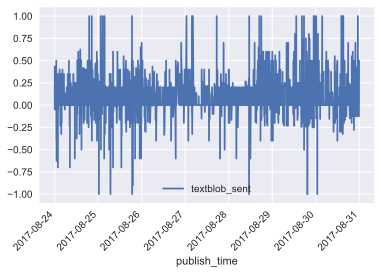

In [54]:
# ARTICLE sentiment over time
# df_amznnews.plot(df_amznnews['publish_time'], df_amznnews['textblob_sent'])
df_amznnews.plot('publish_time', 'textblob_sent')
plt.xticks(rotation=45)
plt.show()

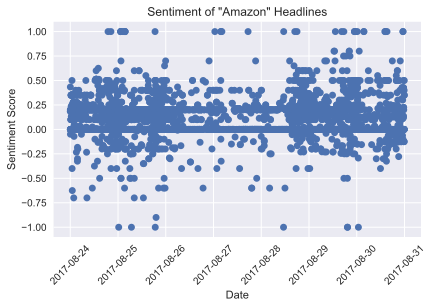

In [187]:
dates = matplotlib.dates.date2num(list(df_amznnews.publish_time))
plt.xticks(rotation=45)
plt.title('Sentiment of "Amazon" Headlines')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.plot_date(dates, df_amznnews.textblob_sent)
plt.savefig('Visuals/all_sents.png', dpi=900, bbox_inches='tight');

In [56]:
df_amznnews_dti = df_amznnews.set_index('publish_time')
df_amznnews_dti_re = df_amznnews_dti['textblob_sent'].resample('1H').sum()
# df_amznnews_dti.info()
df_amznnews_dti_re

publish_time
2017-08-24 00:00:00    16.940512
2017-08-24 01:00:00    14.502128
2017-08-24 02:00:00     9.511364
2017-08-24 03:00:00     5.670833
2017-08-24 04:00:00     3.439394
2017-08-24 05:00:00     2.412500
2017-08-24 06:00:00     0.766667
2017-08-24 07:00:00     3.557576
2017-08-24 08:00:00     4.010417
2017-08-24 09:00:00     1.400000
2017-08-24 10:00:00     2.600000
2017-08-24 11:00:00     1.225000
2017-08-24 12:00:00     3.497727
2017-08-24 13:00:00     5.989773
2017-08-24 14:00:00     5.212121
2017-08-24 15:00:00     4.014069
2017-08-24 16:00:00     2.749134
2017-08-24 17:00:00     5.400000
2017-08-24 18:00:00     7.550000
2017-08-24 19:00:00     9.518579
2017-08-24 20:00:00     5.663636
2017-08-24 21:00:00    13.353680
2017-08-24 22:00:00    30.317027
2017-08-24 23:00:00    22.128175
2017-08-25 00:00:00    23.333694
2017-08-25 01:00:00    14.188456
2017-08-25 02:00:00    11.468831
2017-08-25 03:00:00     9.053883
2017-08-25 04:00:00     4.487013
2017-08-25 05:00:00     0.6158

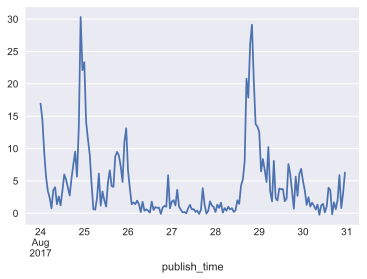

In [57]:
df_amznnews_dti_re.plot()

<Container object of 168 artists>

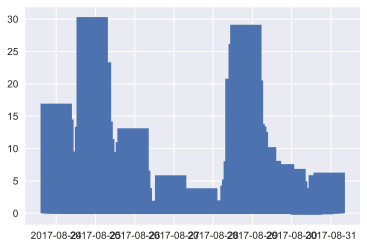

In [58]:
plt.bar(df_amznnews_dti_re.index, df_amznnews_dti_re)

In [ ]:
# could play with rolling sentiment... mean? sum? other?
# df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()

###### Datetime and Graph issues...

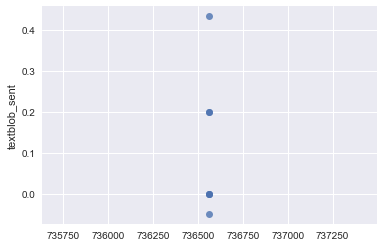

In [192]:
# https://stackoverflow.com/questions/46376252/how-to-convert-list-of-numpy-datetime64-to-matplotlib-dates
# https://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64
# https://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64
plt_dates = mdates.date2num(list(df_amznnews.publish_time))

ax = sns.regplot(x=plt_dates, y='textblob_sent', data=df_amznnews,
                fit_reg=False)

In [181]:
df_amznnews.publish_time

769   2017-08-24 00:04:00
336   2017-08-24 00:01:00
526   2017-08-24 00:03:00
690   2017-08-24 00:04:00
769   2017-08-24 00:04:00
858   2017-08-24 00:05:00
690   2017-08-24 00:04:00
Name: publish_time, dtype: datetime64[ns]

In [189]:
array_dates = []
for x in df_amznnews.publish_time:
    y = np.datetime64(x)
    array_dates.append(y)

In [190]:
array_dates

[numpy.datetime64('2017-08-24T00:04:00.000000'),
 numpy.datetime64('2017-08-24T00:01:00.000000'),
 numpy.datetime64('2017-08-24T00:03:00.000000'),
 numpy.datetime64('2017-08-24T00:04:00.000000'),
 numpy.datetime64('2017-08-24T00:04:00.000000'),
 numpy.datetime64('2017-08-24T00:05:00.000000'),
 numpy.datetime64('2017-08-24T00:04:00.000000')]

In [197]:
np.array(array_dates)

array(['2017-08-24T00:04:00.000000', '2017-08-24T00:01:00.000000',
       '2017-08-24T00:03:00.000000', '2017-08-24T00:04:00.000000',
       '2017-08-24T00:04:00.000000', '2017-08-24T00:05:00.000000',
       '2017-08-24T00:04:00.000000'], dtype='datetime64[us]')

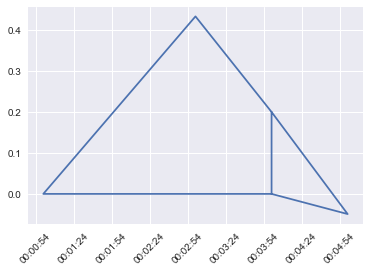

In [199]:
x = np.array(array_dates).astype("M8[ms]").tolist()
y = df_amznnews.textblob_sent

plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

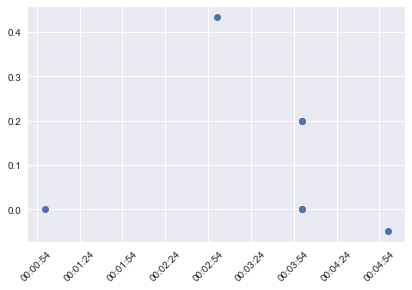

In [209]:
# https://stackoverflow.com/questions/1574088/plotting-time-in-python-with-matplotlib

dates = matplotlib.dates.date2num(list(df_amznnews.publish_time))
plt.xticks(rotation=45)
plt.tight_layout()
plt.plot_date(dates, df_amznnews.textblob_sent);


In [211]:
# https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib
import datetime as dt

# convert your strings to instances of Python datetime.date
dates = df_amznnews.publish_time.tolist()
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
y = range(len(x))

# then plot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.gcf().autofmt_xdate()

TypeError: strptime() argument 1 must be str, not Timestamp

### Sentiment in Stock Market

#### Load ticker data

In [7]:
df_tick = pd.read_pickle('tweet_data/amzn_ohlcv_may18.pkl')
df_tick.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4632 entries, 2000-01-03 to 2018-05-31
Data columns (total 5 columns):
1. open      4632 non-null float64
2. high      4632 non-null float64
3. low       4632 non-null float64
4. close     4632 non-null float64
5. volume    4632 non-null float64
dtypes: float64(5)
memory usage: 217.1+ KB


In [8]:
# set index to datetime index
df_tick.set_index(df_tick.index.to_datetime(), inplace=True)
df_tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4632 entries, 2000-01-03 to 2018-05-31
Data columns (total 5 columns):
1. open      4632 non-null float64
2. high      4632 non-null float64
3. low       4632 non-null float64
4. close     4632 non-null float64
5. volume    4632 non-null float64
dtypes: float64(5)
memory usage: 217.1 KB


/Users/jas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  


In [17]:
df_tick['4. close'][0:10]

2017-08-24    952.45
2017-08-25    945.26
2017-08-28    946.02
2017-08-29    954.06
2017-08-30    967.59
Name: 4. close, dtype: float64

In [9]:
# reduce graph data size
df_tick = df_tick.loc['2017-08-24':'2017-08-30']

#### ticker graph

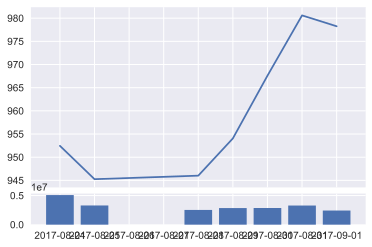

In [27]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
# ax1 = plt.xticks(rotation=45)

ax1.plot(df_tick.index, df_tick['4. close'])
# ax1.plot(df_tick.index, df_tick['100ma'])
ax2.bar(df_tick.index, df_tick['5. volume'])

plt.show()

#### Ticker + Sentiment Graph

**graph along with sentiment**
- aggregate sentiment data by DAY
- add sentiment data to 'df_tick' dataframe
- plug it in for volume

**add amzn article sentiment for week to ticker close data... **
#(1) downsample sentiment data on daily basis (many ways to do this...)
#(2) plug into 'df_tick'

Lots to play with on the sentiment data to make it 'intelligable':
- take log of sum of data... results in range of sentiment scores of 3-5.
- normalize the sum of the data... This one has intuitive promise <<<<
- take the mean of the data
- median of data doesn't do too much
- remove all nuetral scores... (have plenty of sentiments to play with to remove these, which are at least half)

In [18]:
# build new df from 'df_amznnews' so as to leave that available for other play.
df_amznnews_2tick = df_amznnews[['publish_time','textblob_sent', 'vs_compound']]
# set index as datetimeindex
df_amznnews_2tick = df_amznnews.set_index('publish_time')
# resample to align with ticker data
df_amznnews_2tick = df_amznnews_2tick[['textblob_sent', 'vs_compound']].resample('1D').mean()
# result?
print(df_amznnews_2tick)
# print()
# print(np.log(df_amznnews_2tick))

# Normalize entire df: df_norm = (df - df.mean()) / (df.max() - df.min())

              textblob_sent  vs_compound
publish_time                            
2017-08-24         0.117431     0.195959
2017-08-25         0.116186     0.077113
2017-08-26         0.097682     0.081416
2017-08-27         0.078457     0.089842
2017-08-28         0.163032     0.140102
2017-08-29         0.118615     0.087686
2017-08-30         0.065327     0.122651


In [19]:
# plug in to df_tick
df_tick_sent = df_tick.join(df_amznnews_2tick)

In [20]:
df_tick_sent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2017-08-24 to 2017-08-30
Data columns (total 7 columns):
1. open          5 non-null float64
2. high          5 non-null float64
3. low           5 non-null float64
4. close         5 non-null float64
5. volume        5 non-null float64
textblob_sent    5 non-null float64
vs_compound      5 non-null float64
dtypes: float64(7)
memory usage: 480.0 bytes


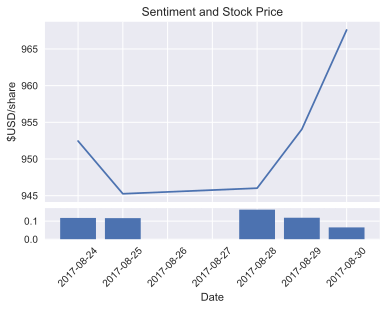

In [21]:
# now the graph...
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
plt.title('Sentiment and Stock Price')
plt.ylabel('$USD/share')
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

plt.xticks(rotation=45)
plt.xlabel('Date')

ax1.plot(df_tick_sent.index, df_tick_sent['4. close'])
# ax1.plot(df_tick.index, df_tick['100ma'])
ax2.bar(df_tick_sent.index, df_tick_sent['textblob_sent'])

plt.savefig('Visuals/stockvsent.png', dpi=900, bbox_inches='tight')
plt.show()

#### Correlation

In [189]:
# Correlation??
df_tick_sent.corr()

,1. open,2. high,3. low,4. close,5. volume,textblob_sent,vs_compound
1. open,1.000000,0.648292,0.684662,0.295109,0.498413,-0.542785,0.355626
2. high,0.648292,1.000000,0.875160,0.898814,0.054975,-0.948420,0.053369
3. low,0.684662,0.875160,1.000000,0.698816,-0.191803,-0.714574,0.015079
4. close,0.295109,0.898814,0.698816,1.000000,-0.066371,-0.858167,0.089688
5. volume,0.498413,0.054975,-0.191803,-0.066371,1.000000,-0.089273,0.688872
textblob_sent,-0.542785,-0.948420,-0.714574,-0.858167,-0.089273,1.000000,0.125917
vs_compound,0.355626,0.053369,0.015079,0.089688,0.688872,0.125917,1.000000


### Sentiment of Classified articles in Stock Market (Classification)

#### Load in labeled and prepared econ data...

In [22]:
df_econ = pd.read_csv('~/ds/data/nlp/Full-Economic-News-DFE-839861.csv', encoding='latin-1')
df_econ = df_econ[['relevance','headline']]
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
relevance    8000 non-null object
headline     8000 non-null object
dtypes: object(2)
memory usage: 125.1+ KB


#### Train the data on labeled econ articles

In [23]:
# set the target
X = df_econ.headline
y = df_econ.relevance

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# vectorize the text (ensure ONLY the text)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)

# make sure to ONLY transform the test data
count_test = count_vectorizer.transform(X_test)
print(count_vectorizer.get_feature_names()[1000:1010])

['boosted', 'boosts', 'boot', 'booth', 'border', 'bored', 'born', 'borrow', 'borrowed', 'borrowers']


In [24]:
# test classification on econ docs
# instantiate the classifier
nb_classifier = MultinomialNB()

# fit the classifer to the training data
nb_classifier.fit(count_train, y_train)

# make prediction on transformed test data
pred = nb_classifier.predict(count_test)

# generate output of accuracy
metrics.accuracy_score(y_test, pred)

0.7965909090909091

#### Train AMZN Articles data ('df_amznnews')

In [ ]:
# make sure classifying on cleaned article titles

In [152]:
# df_amznnews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 769 to 1397573
Data columns (total 10 columns):
publish_time     6459 non-null datetime64[ns]
feed_code        6459 non-null object
source_url       6459 non-null object
headline_text    6459 non-null object
textblob_sent    6459 non-null float64
vader_sent       6459 non-null object
vs_neg           6459 non-null float64
vs_neu           6459 non-null float64
vs_pos           6459 non-null float64
vs_compound      6459 non-null float64
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 715.1+ KB


In [25]:
# Vectorize the articles into a matrix
amznnews_matrix = count_vectorizer.transform(df_amznnews.headline_text)

# predict whether or not economically relevant based on previously fit model
amznnews_pred = nb_classifier.predict(amznnews_matrix)

In [26]:
# this returns a list of the indices where the tweet is related to economics
yes_ind = []
for ind, title in enumerate(amznnews_pred):
    if title == 'yes':
        yes_ind.append(ind)

# random sample to visually confirm...
print(yes_ind[5:10])
print(len(yes_ind))

[155, 156, 166, 180, 195]
218


Here could stop and use various methods to explore the difference between the 'yes' and 'no' economically 'relevant' articles (later)
- 218 of the articles are classified as 'economically relevant' (could improve by ensuring evenly distributed classification of articles, or try other models...)

In [27]:
# below I want the entire DF but it has DT index, not numbered index... maybe with iloc???
# df_amznnews_clsfd = [df_amznnews.isin()]

df_amznnews_clsfd = df_amznnews.iloc[yes_ind]
df_amznnews_clsfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 381028 to 1130261
Data columns (total 10 columns):
publish_time     218 non-null datetime64[ns]
feed_code        218 non-null object
source_url       218 non-null object
headline_text    218 non-null object
textblob_sent    218 non-null float64
vader_sent       218 non-null object
vs_neg           218 non-null float64
vs_neu           218 non-null float64
vs_pos           218 non-null float64
vs_compound      218 non-null float64
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.7+ KB


In [28]:
# df_amznnews_clsfd.sample(10)

### Stock+(Classified)Sentiment

In [29]:
print(df_amznnews_clsfd.info())
print()
print(df_tick.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 381028 to 1130261
Data columns (total 10 columns):
publish_time     218 non-null datetime64[ns]
feed_code        218 non-null object
source_url       218 non-null object
headline_text    218 non-null object
textblob_sent    218 non-null float64
vader_sent       218 non-null object
vs_neg           218 non-null float64
vs_neu           218 non-null float64
vs_pos           218 non-null float64
vs_compound      218 non-null float64
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2017-08-24 to 2017-08-30
Data columns (total 5 columns):
1. open      5 non-null float64
2. high      5 non-null float64
3. low       5 non-null float64
4. close     5 non-null float64
5. volume    5 non-null float64
dtypes: float64(5)
memory usage: 400.0 bytes
None


In [30]:
# build new df from 'df_amznnews' so as to leave that available for other play.
df_amznnews_clsfd_2tick = df_amznnews_clsfd[['publish_time','textblob_sent', 'vs_compound']]
df_amznnews_clsfd_2tick.head()

,publish_time,textblob_sent,vs_compound
381028,2017-08-25 15:13:00,0.0,0.1779
381377,2017-08-25 15:15:00,0.0,0.1779
733,2017-08-24 00:04:00,0.0,0.1779
9551,2017-08-24 00:56:00,0.2,0.1779
16393,2017-08-24 01:35:00,0.2,0.1779


In [31]:
# set index as datetimeindex
df_amznnews_clsfd_2tick = df_amznnews_clsfd_2tick.set_index('publish_time')
df_amznnews_clsfd_2tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 2017-08-25 15:13:00 to 2017-08-29 16:42:00
Data columns (total 2 columns):
textblob_sent    218 non-null float64
vs_compound      218 non-null float64
dtypes: float64(2)
memory usage: 5.1 KB


In [32]:
# resample to align with ticker data
df_amznnews_clsfd_2tick = df_amznnews_clsfd_2tick[['textblob_sent', 'vs_compound']].resample('1D').mean()
# result?
print(df_amznnews_clsfd_2tick)
# print()
# print(np.log(df_amznnews_clsfd_2tick))

              textblob_sent  vs_compound
publish_time                            
2017-08-24         0.040221     0.174324
2017-08-25         0.022069     0.075840
2017-08-26         0.026190     0.128229
2017-08-27         0.042031     0.156500
2017-08-28         0.186635     0.220628
2017-08-29         0.059202     0.023010
2017-08-30         0.030994     0.075432


In [33]:
# plug in to df_tick
df_tick_clsfd_sent = df_tick.join(df_amznnews_clsfd_2tick)
df_tick_clsfd_sent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2017-08-24 to 2017-08-30
Data columns (total 7 columns):
1. open          5 non-null float64
2. high          5 non-null float64
3. low           5 non-null float64
4. close         5 non-null float64
5. volume        5 non-null float64
textblob_sent    5 non-null float64
vs_compound      5 non-null float64
dtypes: float64(7)
memory usage: 480.0 bytes


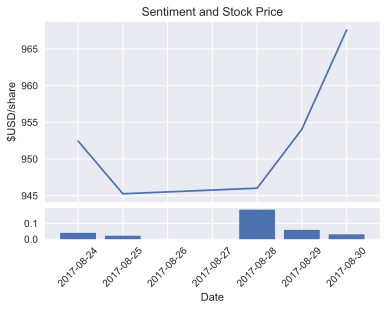

In [34]:
# now the graph...
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
plt.title('Sentiment and Stock Price')
plt.ylabel('$USD/share')
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

plt.xticks(rotation=45)
plt.xlabel('Date')

ax1.plot(df_tick_clsfd_sent.index, df_tick_clsfd_sent['4. close'])
# ax1.plot(df_tick.index, df_tick['100ma'])
ax2.bar(df_tick_clsfd_sent.index, df_tick_clsfd_sent['textblob_sent'])

plt.savefig('Visuals/stockvsent_cld.png', dpi=900, bbox_inches='tight')
plt.show()

In [37]:
df_corr = pd.DataFrame({'daily_price_change': [-7.19, 0.76, 8.02, 13.53], 'tbsent': [0.1174, .1162, .1630, 1186], 
                        'tbsent_class': [.0402, 0.02207, 0.1867, 0.0592]})

df_corr.corr()

,daily_price_change,tbsent,tbsent_class
daily_price_change,1.000000,0.722986,0.427640
tbsent,0.722986,1.000000,-0.159286
tbsent_class,0.427640,-0.159286,1.000000


   textblob_sent  vs_compound
publish_time                            
2017-08-24         0.117431     0.195959
2017-08-25         0.116186     0.077113
2017-08-26         0.097682     0.081416
2017-08-27         0.078457     0.089842
2017-08-28         0.163032     0.140102
2017-08-29         0.118615     0.087686
2017-08-30         0.065327     0.122651

In [191]:
df_tick_clsfd_sent

,1. open,2. high,3. low,4. close,5. volume,textblob_sent,vs_compound
2017-08-24,957.42,959.000,941.1400,952.45,5086748.0,0.040221,0.174324
2017-08-25,956.00,957.621,944.1000,945.26,3292776.0,0.022069,0.075840
2017-08-28,946.54,953.000,942.2500,946.02,2529087.0,0.186635,0.220628
2017-08-29,940.00,956.000,936.3300,954.06,2853972.0,0.059202,0.023010
2017-08-30,958.44,969.410,956.9062,967.59,2860718.0,0.030994,0.075432


In [190]:
# correlation
df_tick_clsfd_sent.corr()

,1. open,2. high,3. low,4. close,5. volume,textblob_sent,vs_compound
1. open,1.000000,0.648292,0.684662,0.295109,0.498413,-0.509622,0.166664
2. high,0.648292,1.000000,0.875160,0.898814,0.054975,-0.595910,-0.354617
3. low,0.684662,0.875160,1.000000,0.698816,-0.191803,-0.260140,-0.065321
4. close,0.295109,0.898814,0.698816,1.000000,-0.066371,-0.412888,-0.392118
5. volume,0.498413,0.054975,-0.191803,-0.066371,1.000000,-0.434904,0.252006
textblob_sent,-0.509622,-0.595910,-0.260140,-0.412888,-0.434904,1.000000,0.680655
vs_compound,0.166664,-0.354617,-0.065321,-0.392118,0.252006,0.680655,1.000000


In [ ]:
# manual correlation test
df_corr = pd.DataFrame({'daily_price_change': [-7.19, 0.76, 8.02, 13.53], 'tbsent': [0.1174, .1162, .1630, 1186], 
                        'tbsent_class': [.0402, 0.02207, 0.1867, 0.0592]})

df_corr.corr()

### Word Cloud

https://github.com/amueller/word_cloud

#### Article cloud

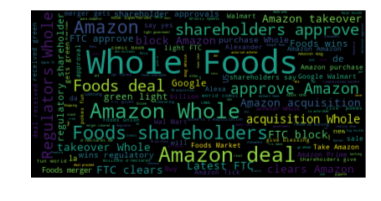

In [77]:
# from os import path
from wordcloud import WordCloud

# d = path.dirname(__file__)

# Read the whole text.
# text = open(path.join(d, 'constitution.txt')).read()
text = ' '.join(df_amznnews.headline_text)

# # Generate a word cloud image
# wordcloud = WordCloud().generate(text)

# # Display the generated image:
# # the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Visuals/article_cloud.png', dpi=900, bbox_inches='tight')
# plt.show()

#### Twitter cloud

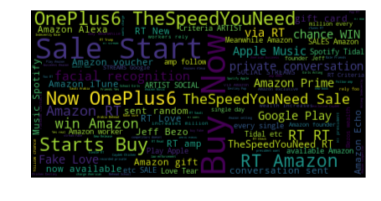

In [76]:
# from os import path
from wordcloud import WordCloud

# d = path.dirname(__file__)

# Read the whole text.
# text = open(path.join(d, 'constitution.txt')).read()
text = ' '.join(clean_list)

# # Generate a word cloud image
# wordcloud = WordCloud().generate(text)

# # Display the generated image:
# # the matplotlib way:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Visuals/twitter_cloud.png', dpi=900, bbox_inches='tight'); # , bbox_inches='tight'
# plt.show()

# Misc (reference)

In [ ]:
# plotting with timeseries
a = np.array([np.datetime64('2017-01-03T00:00:00.000000000'),
     np.datetime64('2017-01-04T00:00:00.000000000'),
     np.datetime64('2017-01-05T00:00:00.000000000'),
     np.datetime64('2017-01-06T00:00:00.000000000'),
     np.datetime64('2017-01-09T00:00:00.000000000'),
     np.datetime64('2017-01-10T00:00:00.000000000'),
     np.datetime64('2017-01-11T00:00:00.000000000'),
     np.datetime64('2017-01-12T00:00:00.000000000'),
     np.datetime64('2017-01-13T00:00:00.000000000'),
     np.datetime64('2017-01-16T00:00:00.000000000'),
     np.datetime64('2017-01-17T00:00:00.000000000'),
     np.datetime64('2017-01-18T00:00:00.000000000'),
     np.datetime64('2017-01-19T00:00:00.000000000'),
     np.datetime64('2017-01-20T00:00:00.000000000'),
     np.datetime64('2017-01-23T00:00:00.000000000'),
     np.datetime64('2017-01-24T00:00:00.000000000'),
     np.datetime64('2017-01-25T00:00:00.000000000'),
     np.datetime64('2017-01-26T00:00:00.000000000'),
     np.datetime64('2017-01-27T00:00:00.000000000'),
     np.datetime64('2017-02-01T00:00:00.000000000')])

x = a.astype("M8[ms]").tolist()
y = np.random.rand(len(a))

plt.plot(x, y)

plt.show()

In [ ]:
# Scrape only article text (to be tested...)
import re
import urllib.request
from bs4 import BeautifulSoup
 
html = urllib.request.urlopen('http://bgr.com/2014/10/15/google-android-5-0-lollipop-release/')
soup = BeautifulSoup(html)
data = soup.findAll(text=True)
 
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True
 
result = filter(visible, data)
 
print list(result)

In [ ]:
# clean the text as list (ORIGINAL)
pre_filter = []

for x in df_news.headline_text:
    w = clean_news(x)
    pre_filter.append(w)
    
len(pre_filter)